#### Kaggle Competition : Costan Rican Household Poverty Level Prediction
https://www.kaggle.com/c/costa-rican-household-poverty-prediction

## 1. Investigate : Know data types

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

%matplotlib inline
plt.style.use('fivethirtyeight')

In [71]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1   ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
0     0   ...            100    1849               1        100             0   
1     0   ...            144    4489               1        144             0   
2     0   ...            121    8464               1          0             0   
3     0   ...             81     289              16        121             4   
4     0   ...            121    1369              16        121             4   

   SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
0         1.000000            0.0      100.0   1849       4  
1         1.000000           64.0      144.0   4489       4  
2         0.250000           64.0      121.0   8464       4  
3         1.777778            1.0      121.0    289       4  
4         1.777778            1.0      121.0   1369       4  

[5 rows x 143 columns]

In [333]:
code=pd.read_csv('codebook.csv')
code.columns=['name','desc']
code.head()

name                               desc
0    v2a1               Monthly rent payment
1  hacdor        =1 Overcrowding by bedrooms
2   rooms   number of all rooms in the house
3  hacapo           =1 Overcrowding by rooms
4    v14a     =1 has toilet in the household

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


Text(0.5, 1.0, 'count of unique values in integer columns')

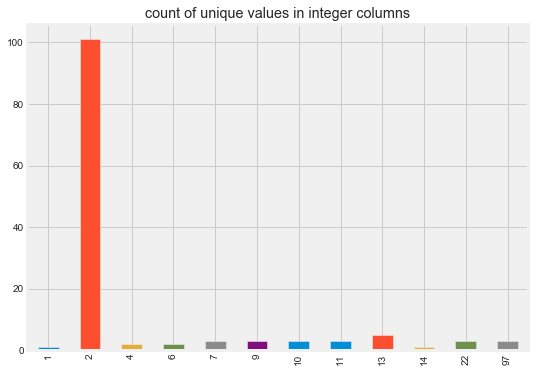

In [5]:
#Integer columns
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(figsize=(8,6))
plt.title('count of unique values in integer columns')

means binary columns are more than 100

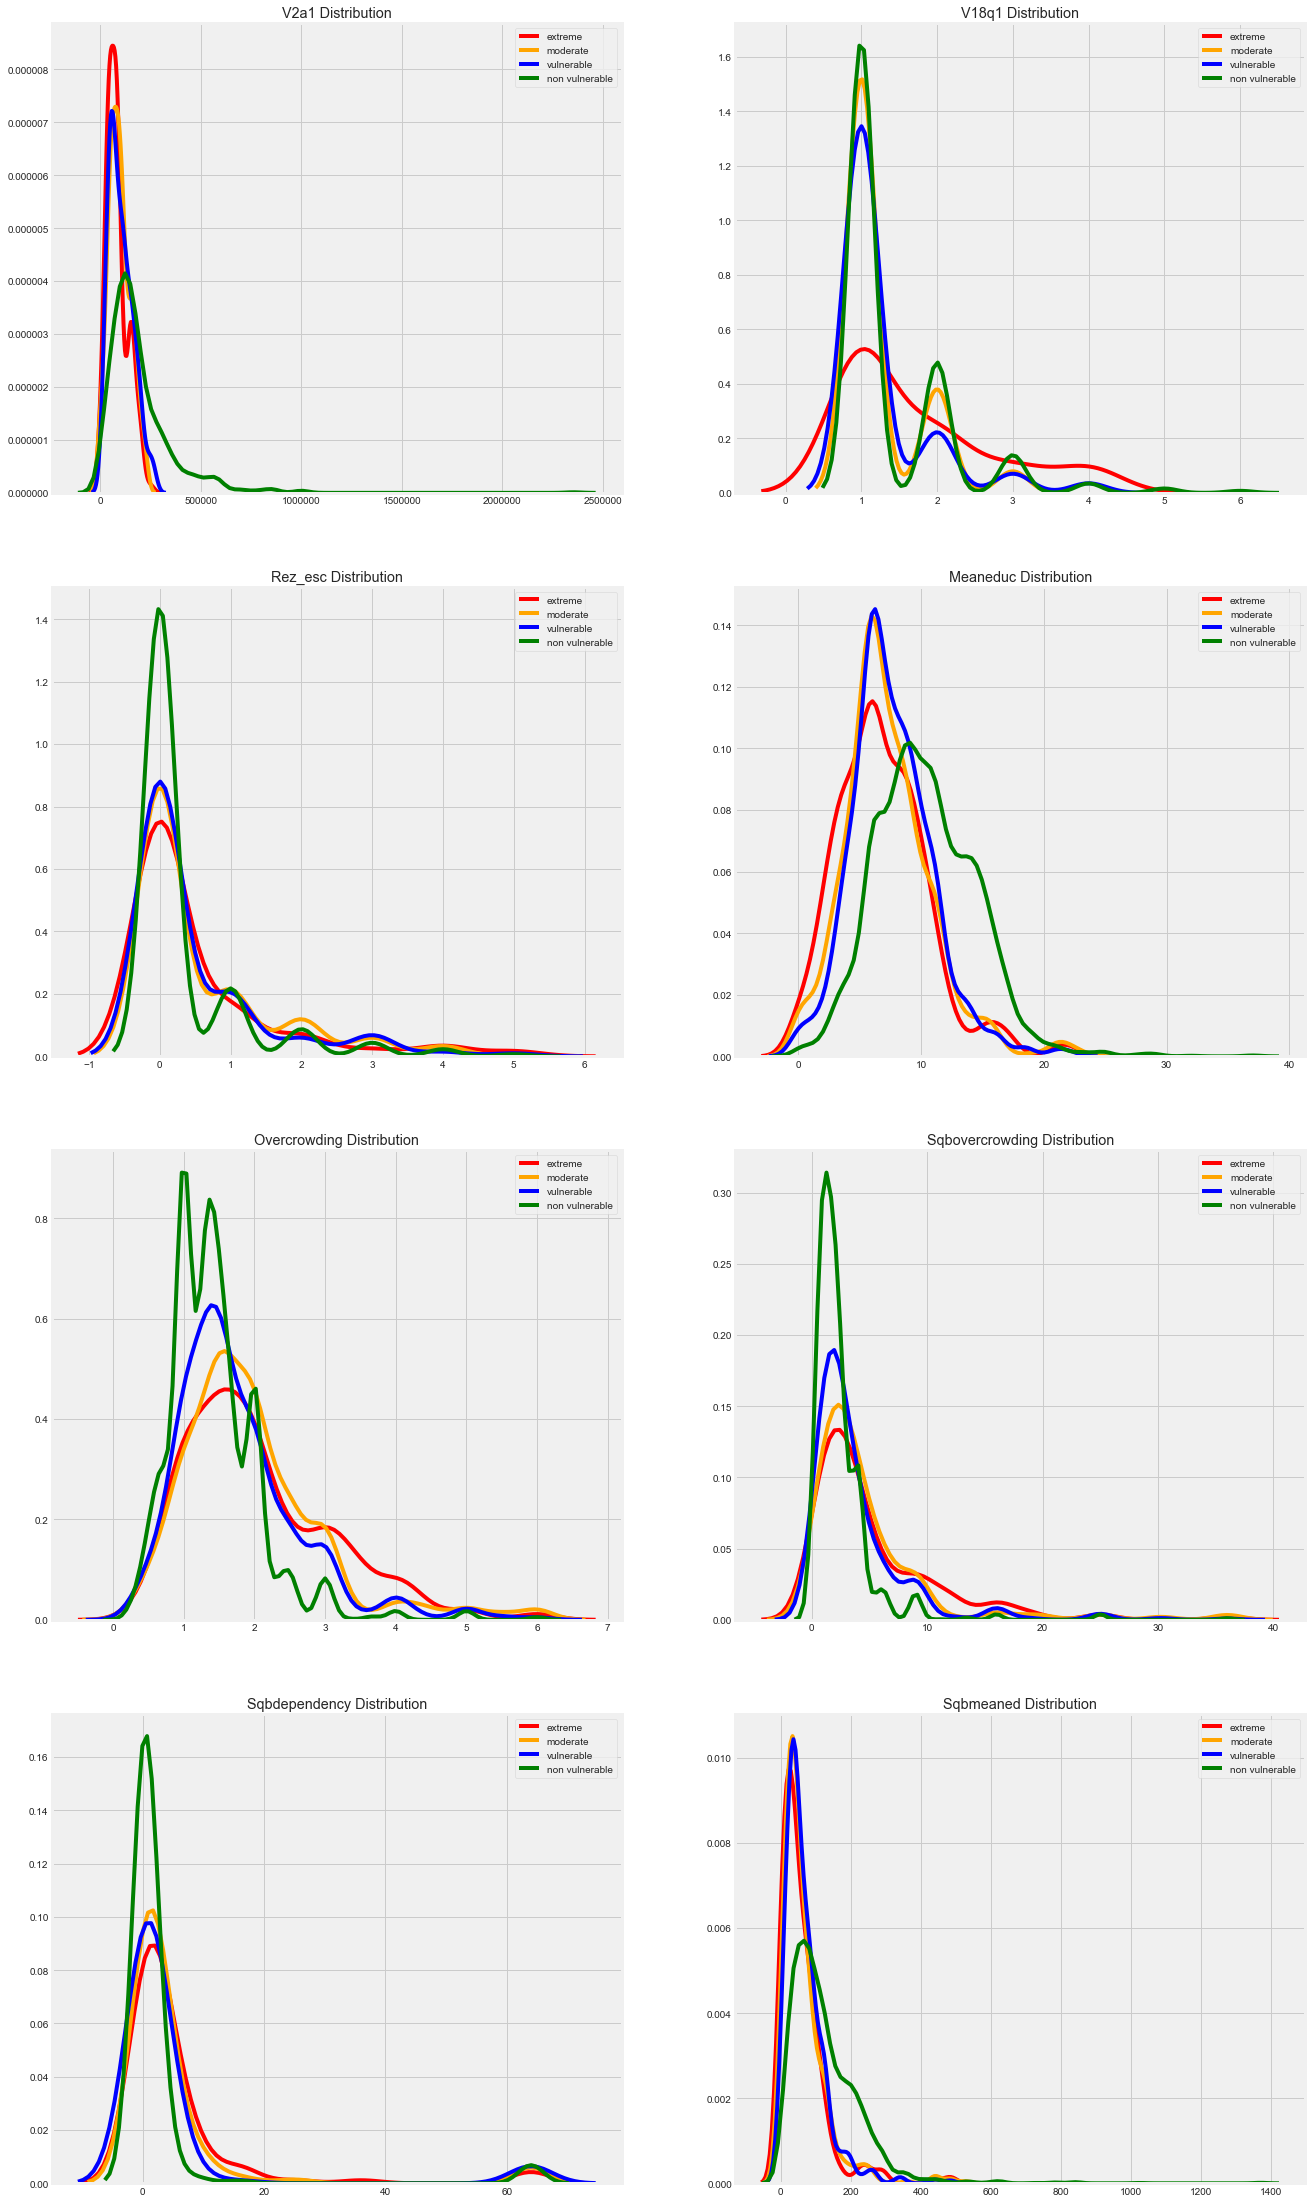

In [8]:
#8 float columns
from collections import OrderedDict

plt.figure(figsize=(20,16))
colors = OrderedDict({1:'red',2:'orange',3:'blue',4:'green'})
poverty = OrderedDict({1:'extreme',2:'moderate',3:'vulnerable',4:'non vulnerable'})

for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4,2,i+1)
    for pov, color in colors.items():
        sns.kdeplot(train.loc[train['Target']==pov,col].dropna(),
                   ax=ax, color=color, label=poverty[pov])
    plt.title(f'{col.capitalize()} Distribution')

plt.subplots_adjust(top=2)

In [9]:
train.select_dtypes('object').head()

Id    idhogar dependency edjefe edjefa
0  ID_279628684  21eb7fcc1         no     10     no
1  ID_f29eb3ddd  0e5d7a658          8     12     no
2  ID_68de51c94  2c7317ea8          8     no     11
3  ID_d671db89c  2b58d945f        yes     11     no
4  ID_d56d6f5f5  2b58d945f        yes     11     no

## 2. EDA

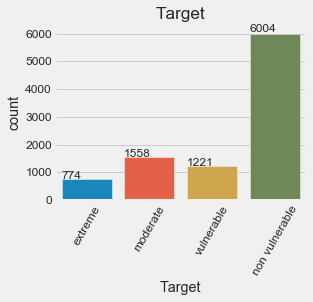

In [337]:
fig= plt.subplots(figsize=(4,3))
ax = sns.countplot('Target', data=train)
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x(),p.get_height()*1.01))
ax.set_title('Target')
plt.xticks([x-1 for x in poverty.keys()], list(poverty.values()),rotation=60)
plt.show()

<Figure size 432x288 with 0 Axes>

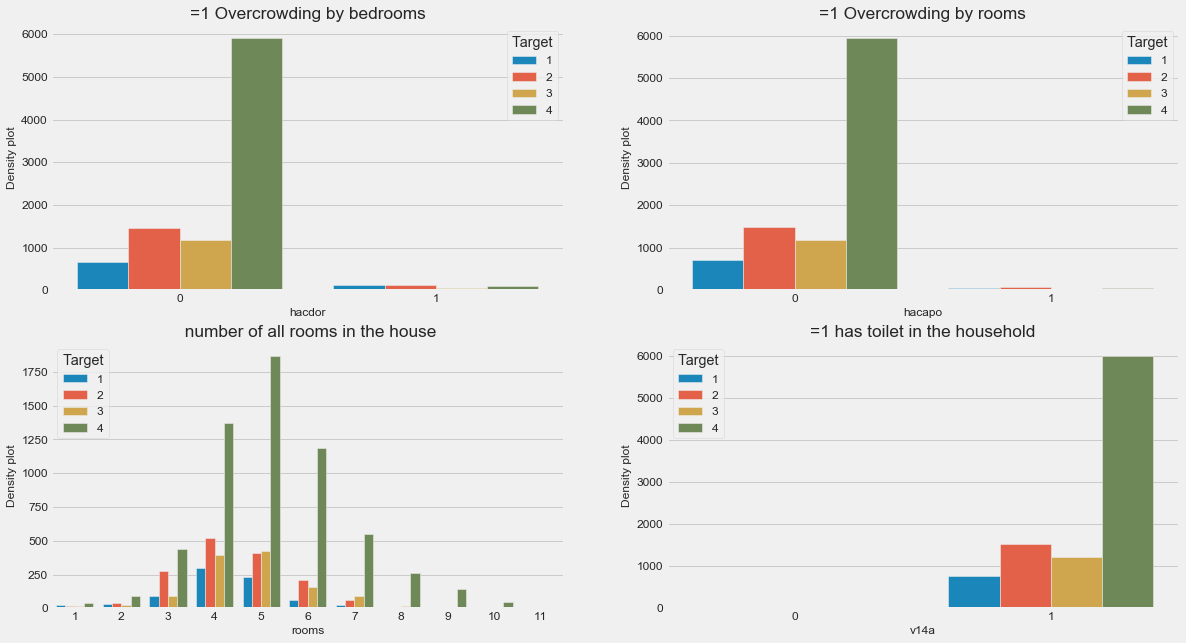

In [338]:
import numpy as np
var = ['hacdor','hacapo','rooms','v14a']

plt.figure()
fig, axs = plt.subplots(2,2,figsize=(18,10))
i=0
for feature in var:
    i+=1
    plt.subplot(2,2,i)
    sns.countplot(feature,hue='Target', data=train)
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [339]:
len(train.loc[(train['v14a']==0) & (train['Target']==4)]) #0인부분이 없는건 아닌듯 하다

10

<Figure size 432x288 with 0 Axes>

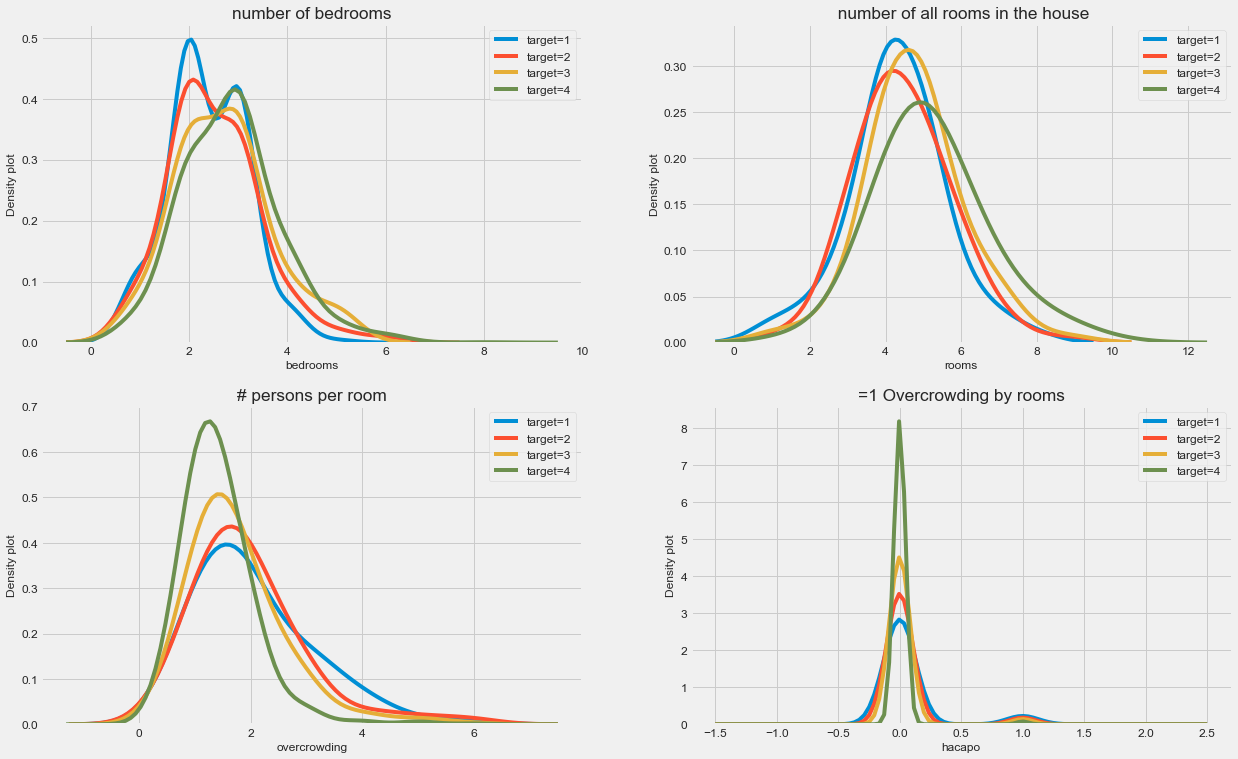

In [340]:
var = ['bedrooms','rooms','overcrowding','hacapo']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(2,2,figsize=(19,12))
i=0
for feature in var:
    i+=1
    plt.subplot(2,2,i)
    sns.kdeplot(t1[feature], bw=.5, label="target=1")
    sns.kdeplot(t2[feature], bw=.5, label="target=2") #bandwidth가중요
    sns.kdeplot(t3[feature], bw=.5, label="target=3")
    sns.kdeplot(t4[feature], bw=.5, label="target=4") #bandwidth가중요
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

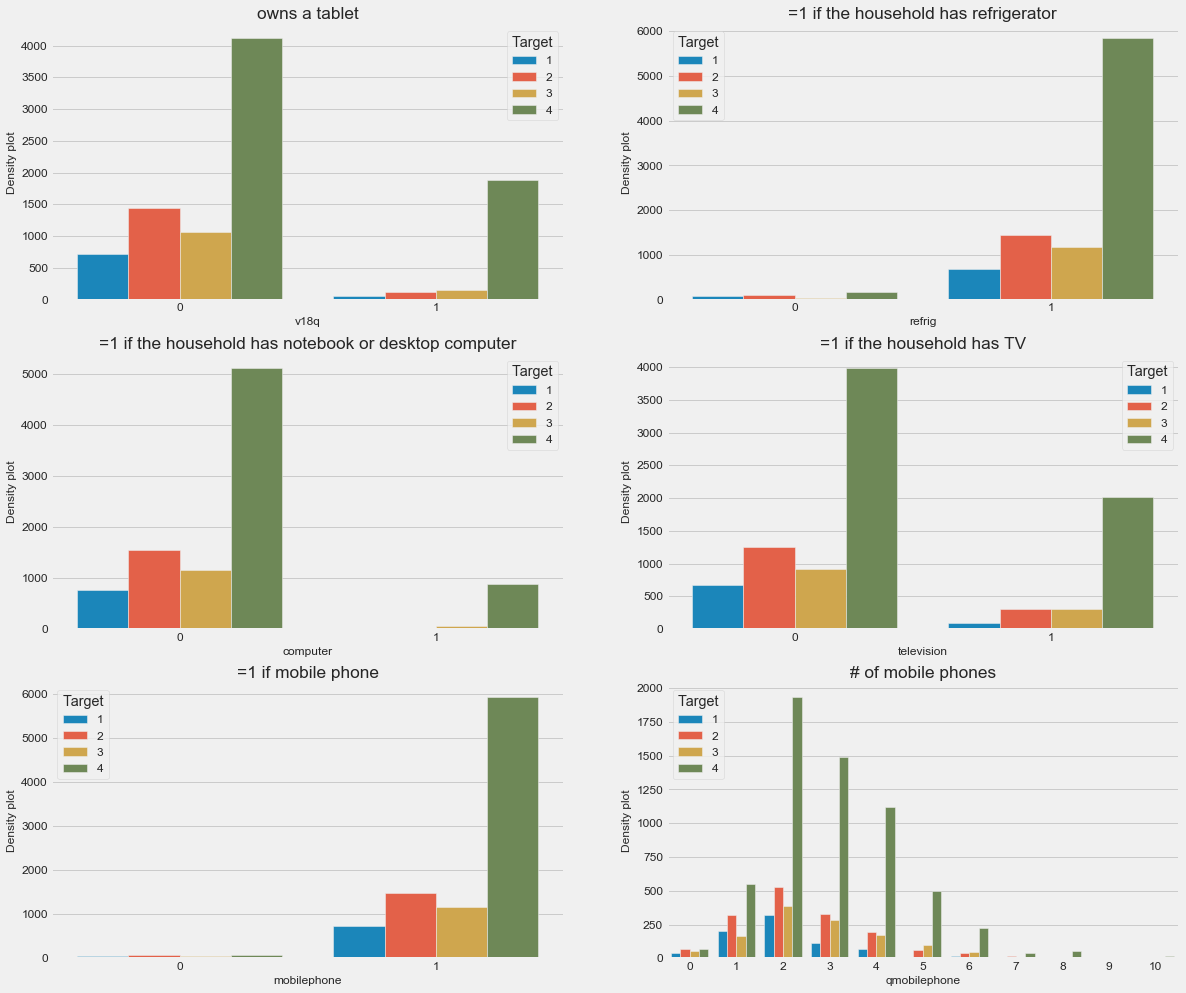

In [341]:
#tech things
var = ['v18q','refrig','computer','television','mobilephone','qmobilephone']

plt.figure()
fig, axs = plt.subplots(3,2,figsize=(18,16))
i=0
for feature in var:
    i+=1
    plt.subplot(3,2,i)
    sns.countplot(feature,hue='Target', data=train)
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

tv랑 computer가 없다에 target4가 많이 포함된것도 신기 - 비율로 봤을때 4 target 동등한듯

In [342]:
print(len(train.loc[(train['computer']==1) & (train['Target']==1)]))
print(len(train.loc[(train['computer']==1) & (train['Target']==2)]))

13
20


<Figure size 432x288 with 0 Axes>

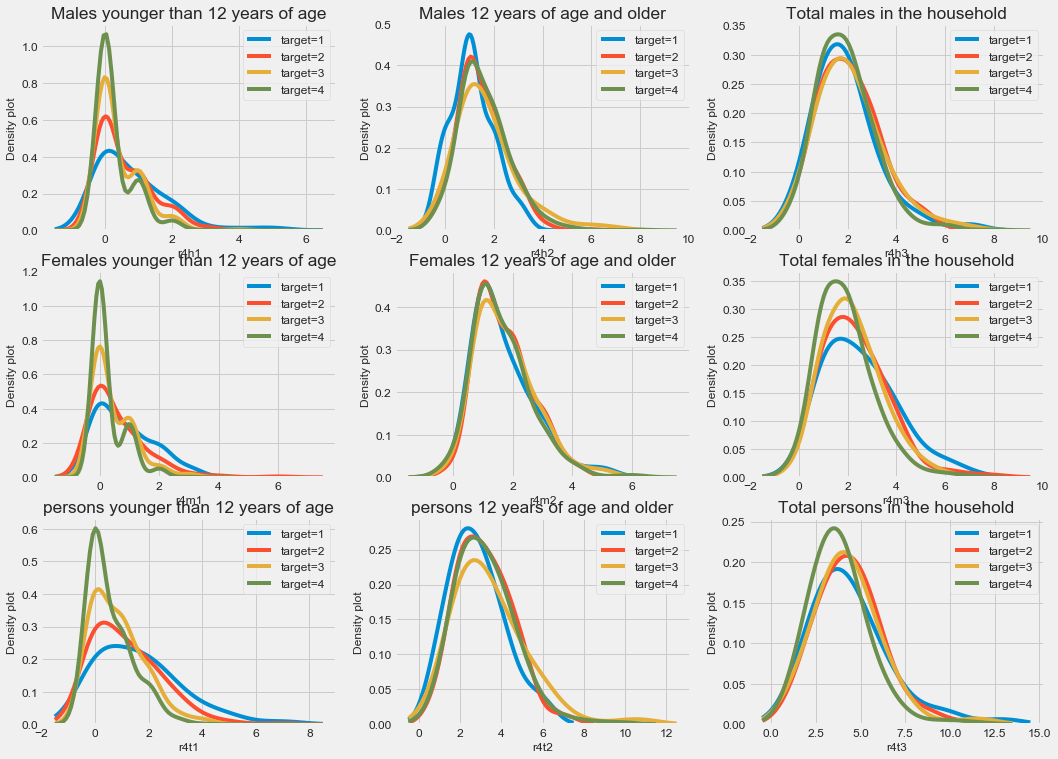

In [343]:
var = ['r4h1','r4h2','r4h3','r4m1','r4m2','r4m3','r4t1','r4t2','r4t3']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(3,3,figsize=(16,12))
i=0
for feature in var:
    i+=1
    plt.subplot(3,3,i)
    sns.kdeplot(t1[feature], bw=.5, label="target=1")
    sns.kdeplot(t2[feature], bw=.5, label="target=2") #bandwidth가중요
    sns.kdeplot(t3[feature], bw=.5, label="target=3")
    sns.kdeplot(t4[feature], bw=.5, label="target=4") #bandwidth가중요
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

4->3->2->1 순으로 가족수가 적었고, 특히 아이들(12살미만) 수는 현저한 차이를 보임

<Figure size 432x288 with 0 Axes>

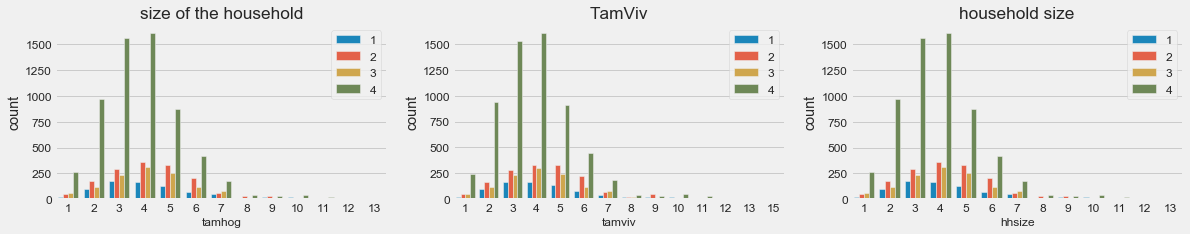

In [344]:
var = ['tamhog','tamviv','hhsize']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(1,3,figsize=(18,3))
i=0
for feature in var:
    i+=1
    plt.subplot(1,3,i)
    sns.countplot(feature, data=train, hue='Target')
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel(feature, fontsize=12)
    plt.legend(loc='upper right')
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

tamhog, tamviv, hhsize 매우 비슷한 분포를 보임 (tamviv = number of persons living in the household)

<Figure size 432x288 with 0 Axes>

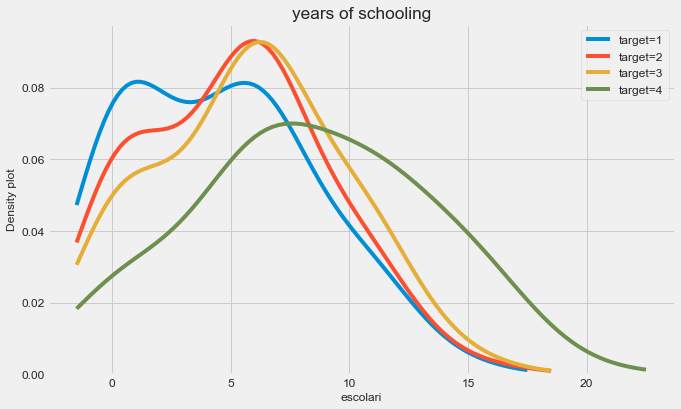

In [346]:
var = ['escolari']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(1,1,figsize=(10,6))
i=0
for feature in var:
    i+=1
    plt.subplot(1,1,i)
    sns.kdeplot(t1[feature], bw=.5, label="target=1")
    sns.kdeplot(t2[feature], bw=.5, label="target=2") #bandwidth가중요
    sns.kdeplot(t3[feature], bw=.5, label="target=3")
    sns.kdeplot(t4[feature], bw=.5, label="target=4") #bandwidth가중요
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [347]:
#각 target마다 변수가 차지하는 비율
df=train[['paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras','paredother','Target']].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(8):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df2

paredblolad  paredzocalo  paredpreb  pareddes  paredmad  paredzinc  \
0     0.391473     0.107235   0.251938  0.015504  0.196382   0.029716   
1     0.375481     0.115533   0.243902  0.026958  0.210526   0.022465   
2     0.515971     0.095823   0.234234  0.008190  0.142506   0.003276   
3     0.692705     0.060460   0.155896  0.002998  0.075117   0.010493   

   paredfibras  paredother  
0     0.007752    0.000000  
1     0.001926    0.003209  
2     0.000000    0.000000  
3     0.000833    0.001499

In [348]:
df=pd.concat([df2,df['Target']],axis=1)
df

paredblolad  paredzocalo  paredpreb  pareddes  paredmad  paredzinc  \
0     0.391473     0.107235   0.251938  0.015504  0.196382   0.029716   
1     0.375481     0.115533   0.243902  0.026958  0.210526   0.022465   
2     0.515971     0.095823   0.234234  0.008190  0.142506   0.003276   
3     0.692705     0.060460   0.155896  0.002998  0.075117   0.010493   

   paredfibras  paredother  Target  
0     0.007752    0.000000       1  
1     0.001926    0.003209       2  
2     0.000000    0.000000       3  
3     0.000833    0.001499       4

<Figure size 432x288 with 0 Axes>

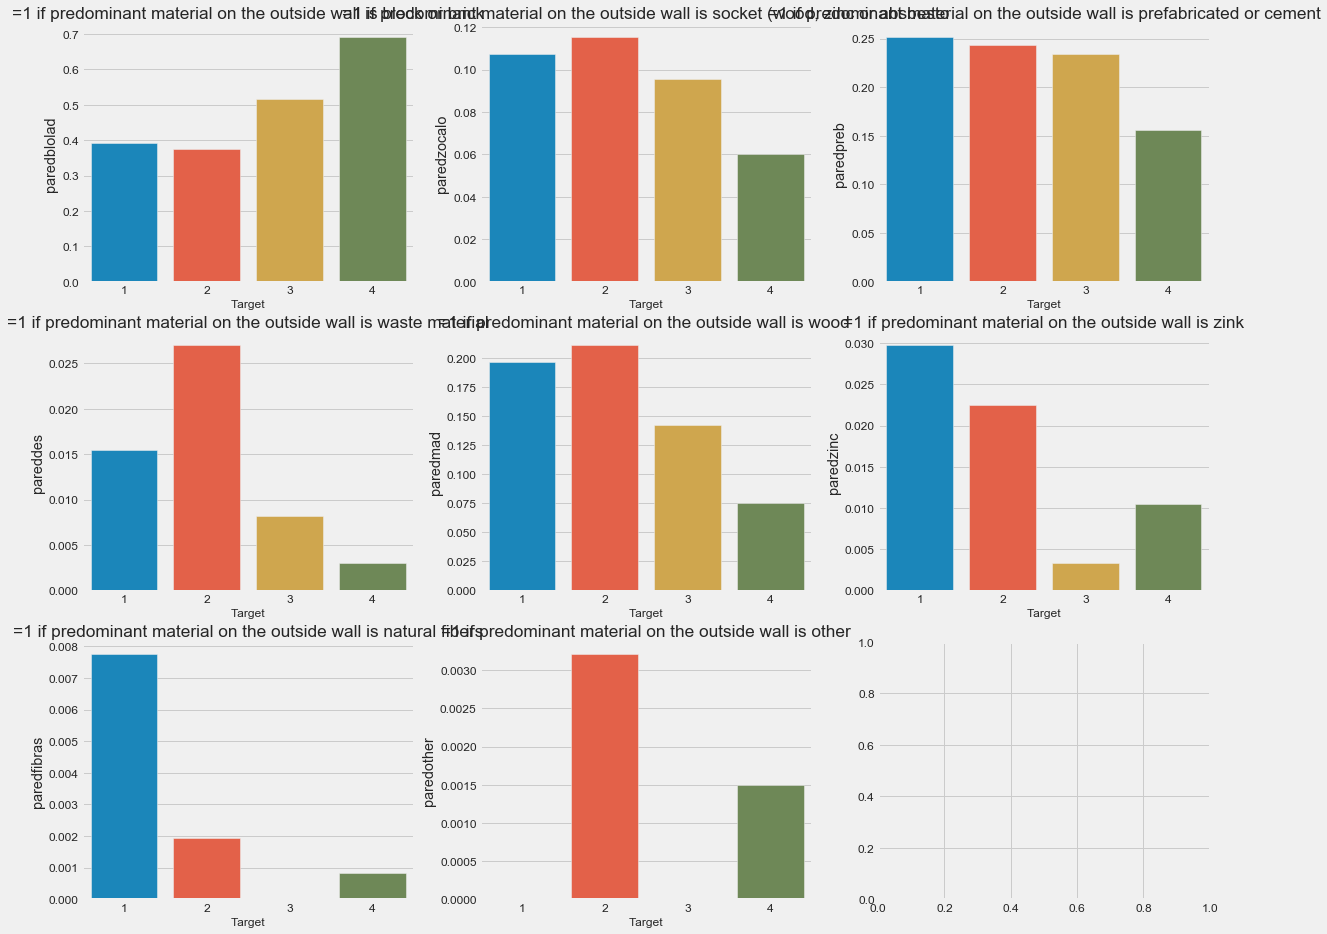

In [349]:
var = ['paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras','paredother']

plt.figure()
fig, axs = plt.subplots(3,3,figsize=(18,15))
i=0
for feature in var:
    i+=1
    plt.subplot(3,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

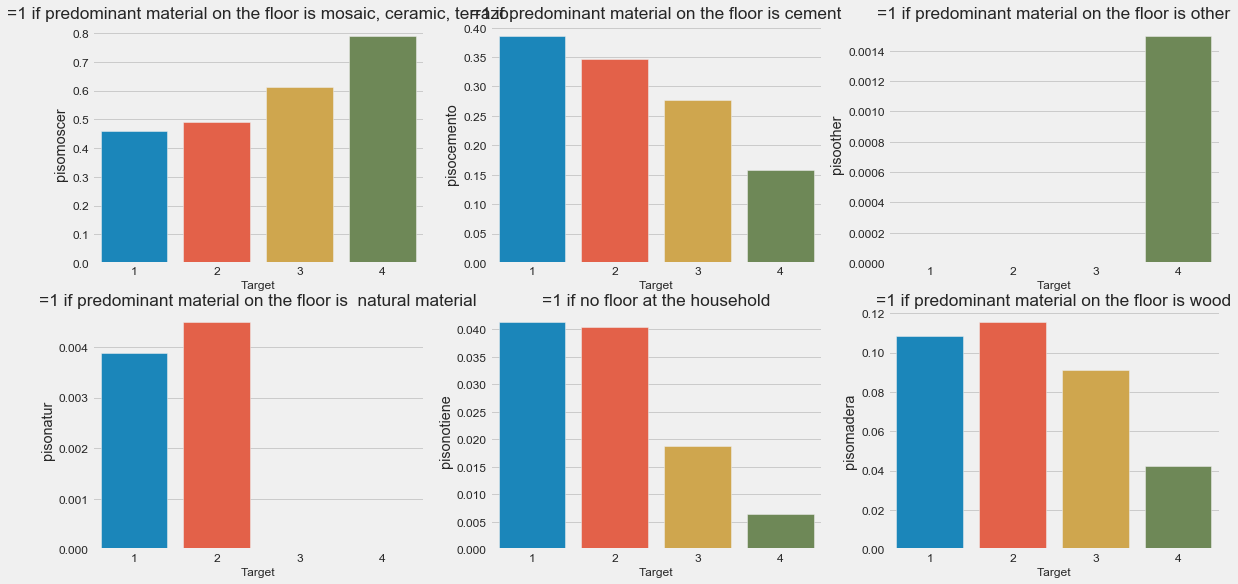

In [350]:
var = ['pisomoscer','pisocemento','pisoother','pisonatur','pisonotiene','pisomadera','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(6):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(2,3,figsize=(18,9))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(2,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

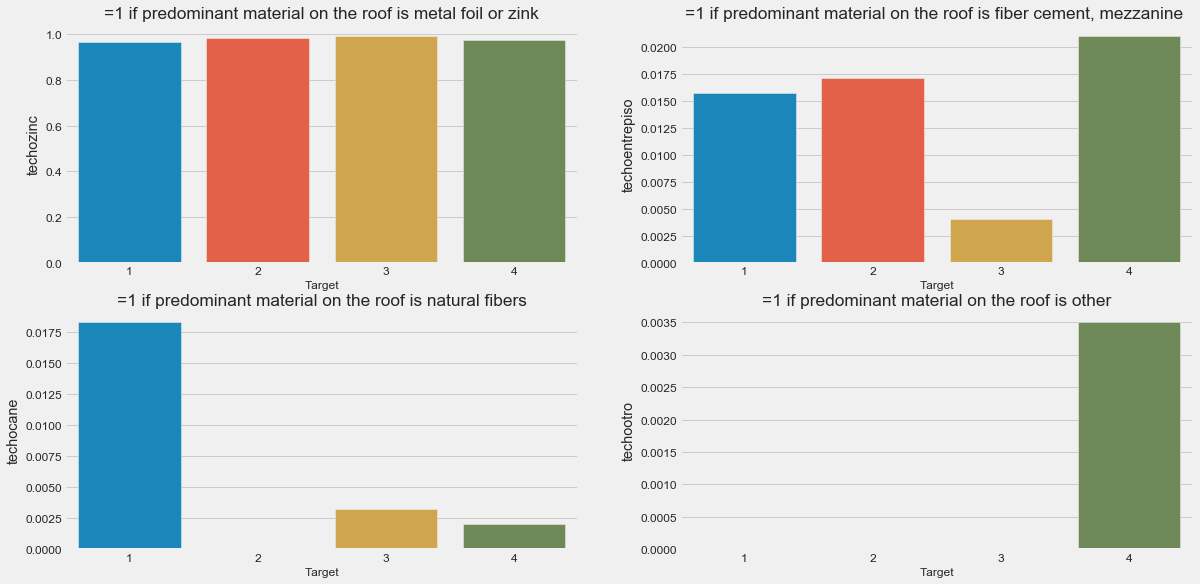

In [351]:
var = ['techozinc','techoentrepiso','techocane','techootro','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(4):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(2,2,figsize=(18,9))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(2,2,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

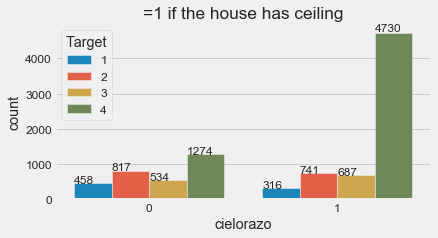

In [352]:
fig= plt.subplots(figsize=(6,3))
ax = sns.countplot('cielorazo', data=train,hue='Target')
for p in ax.patches:
    if np.isnan(float(p.get_height())):
        ax.annotate(0,(p.get_x(),0))
    else:
        ax.annotate(int(p.get_height()),(p.get_x(),p.get_height()*1.01))
ax.set_title('=1 if the house has ceiling')
plt.show()

<Figure size 432x288 with 0 Axes>

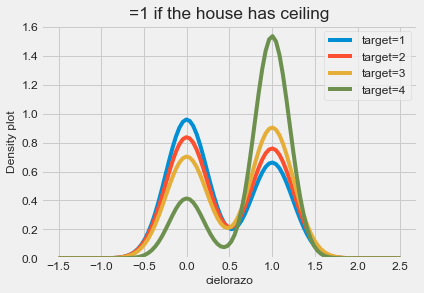

In [353]:
var = ['cielorazo']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(1,1,figsize=(6,4))
i=0
for feature in var:
    i+=1
    plt.subplot(1,1,i)
    sns.kdeplot(t1[feature], bw=.5, label="target=1")
    sns.kdeplot(t2[feature], bw=.5, label="target=2") #bandwidth가중요
    sns.kdeplot(t3[feature], bw=.5, label="target=3")
    sns.kdeplot(t4[feature], bw=.5, label="target=4") #bandwidth가중요
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

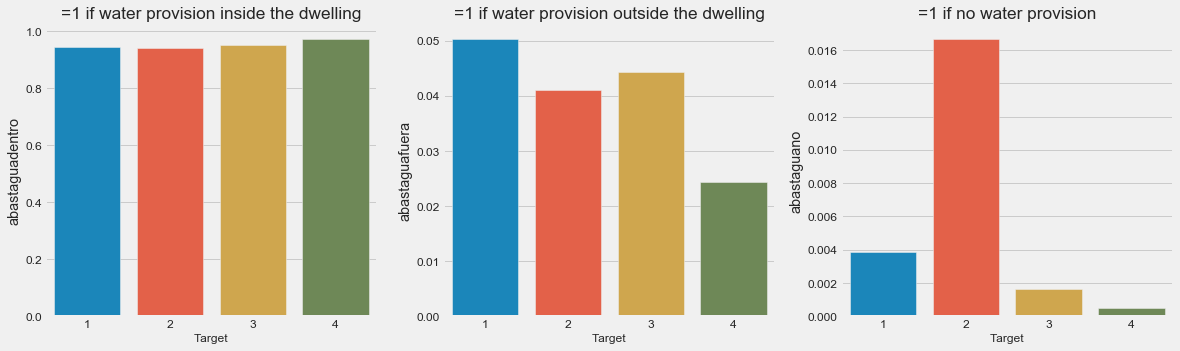

In [354]:
var = ['abastaguadentro','abastaguafuera','abastaguano','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(3):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(1,3,figsize=(18,5))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(1,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

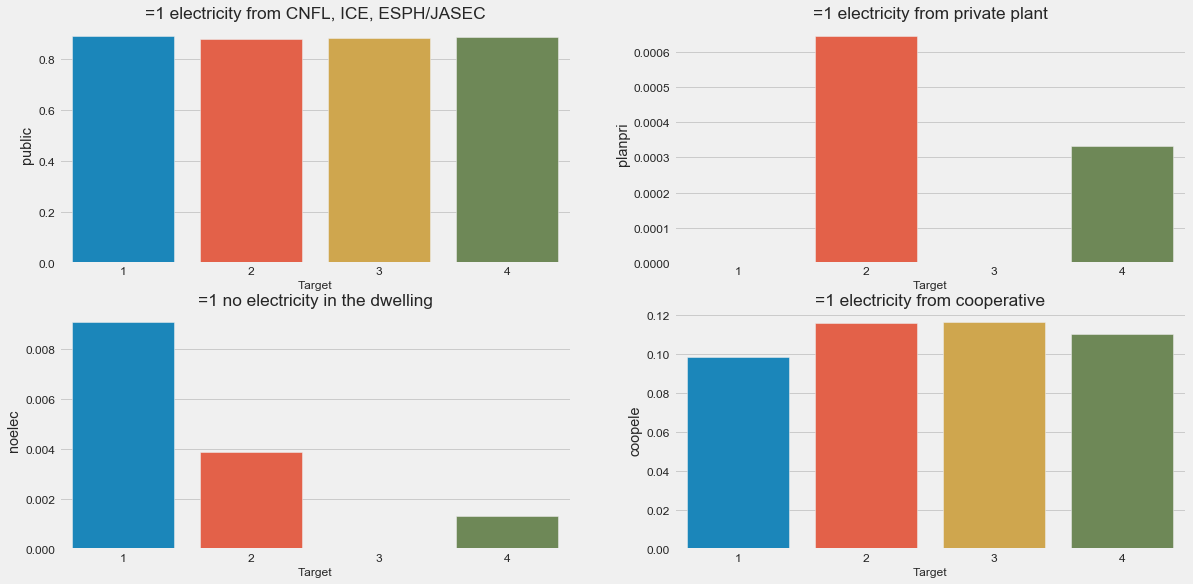

In [355]:
var = ['public','planpri','noelec','coopele','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(4):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(2,2,figsize=(18,9))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(2,2,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

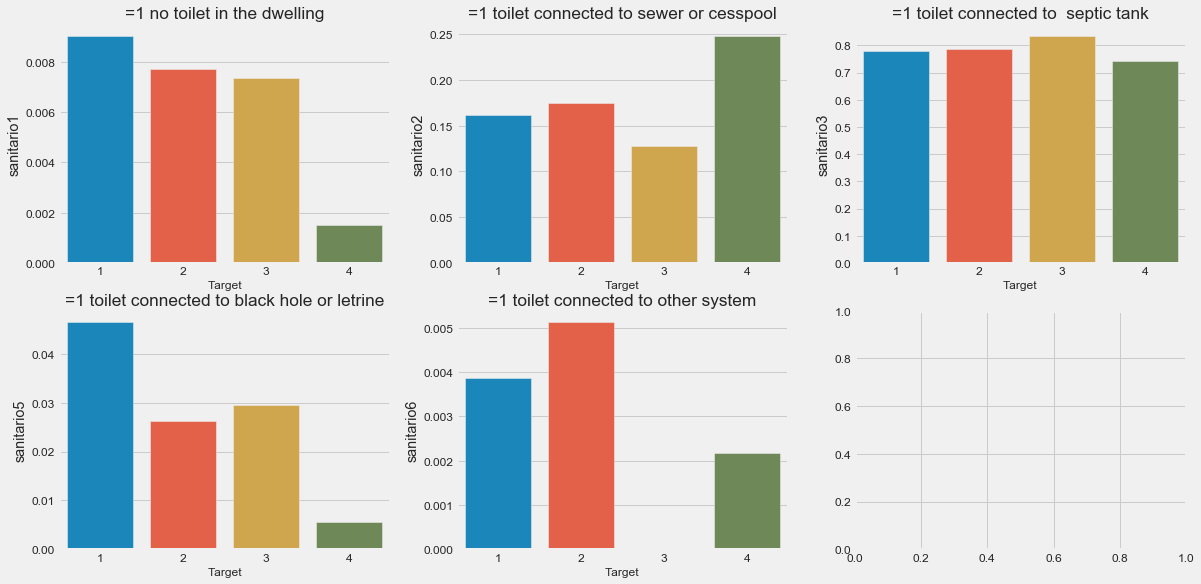

In [356]:
var = ['sanitario1','sanitario2','sanitario3','sanitario5','sanitario6','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(5):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(2,3,figsize=(18,9))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(2,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

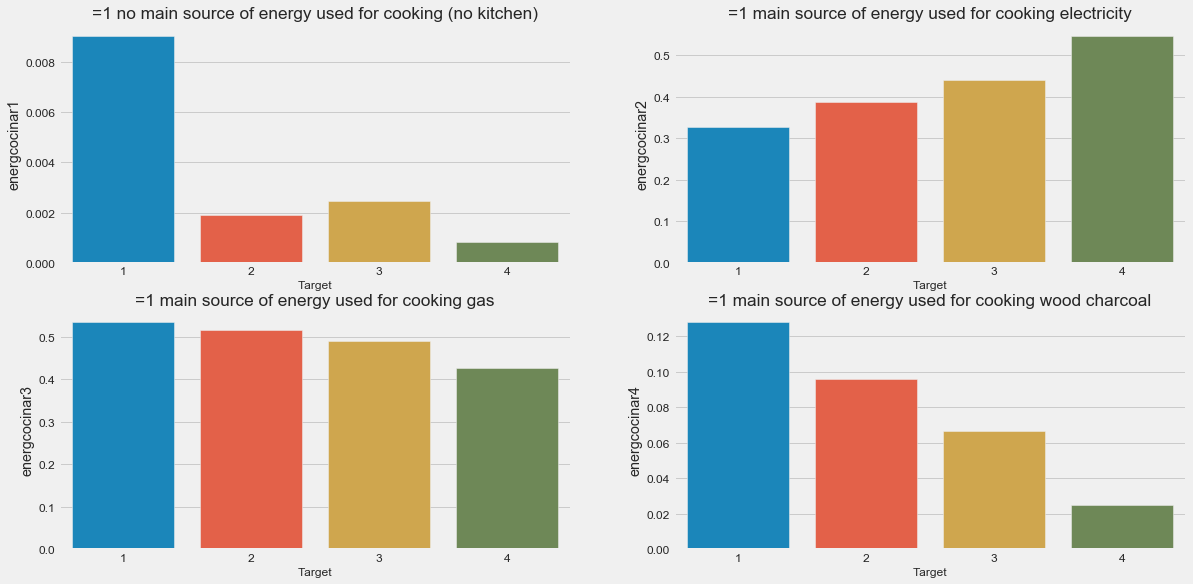

In [357]:
var = ['energcocinar1','energcocinar2','energcocinar3','energcocinar4','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(4):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(2,2,figsize=(18,9))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(2,2,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

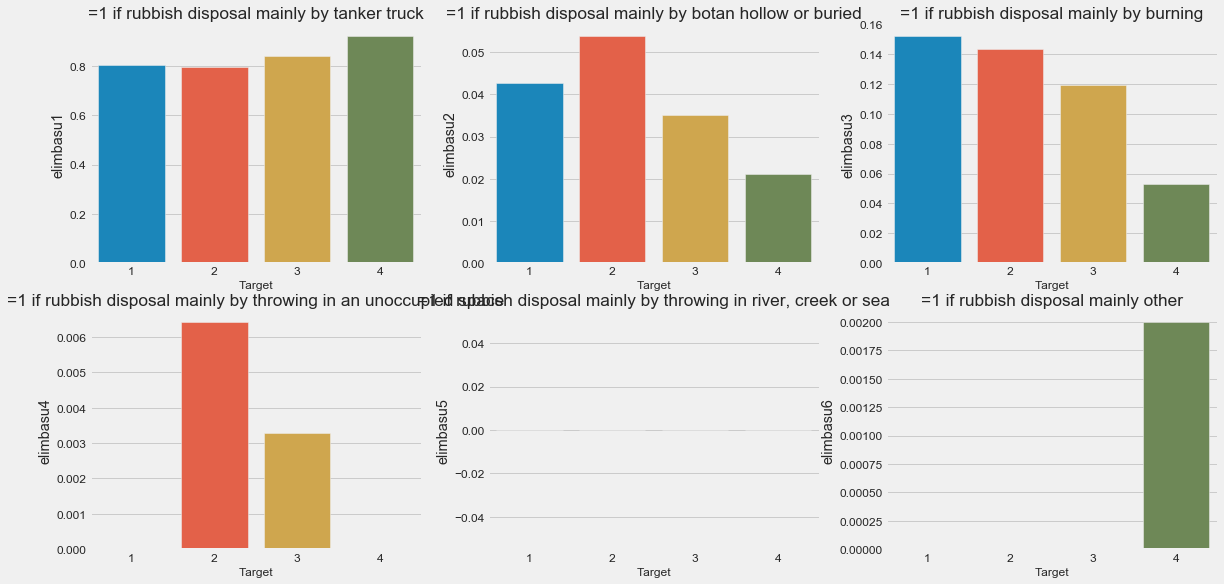

In [358]:
var = ['elimbasu1','elimbasu2','elimbasu3','elimbasu4','elimbasu5','elimbasu6','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(6):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(2,3,figsize=(18,9))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(2,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

In [359]:
train.elimbasu5.unique() #버려도될듯

array([0], dtype=int64)

<Figure size 432x288 with 0 Axes>

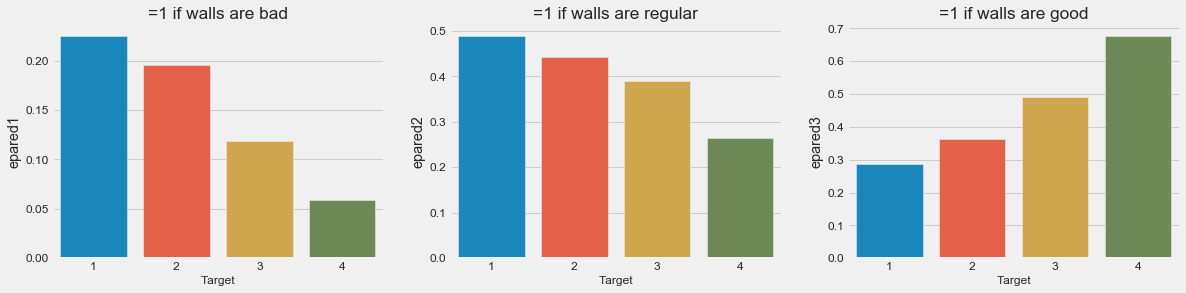

In [360]:
var = ['epared1','epared2','epared3','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(3):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(1,3,figsize=(18,4))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(1,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

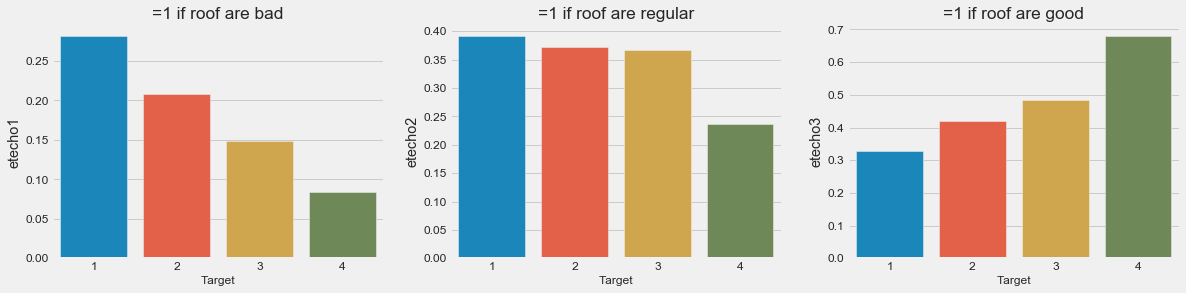

In [361]:
var = ['etecho1','etecho2','etecho3','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(3):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(1,3,figsize=(18,4))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(1,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

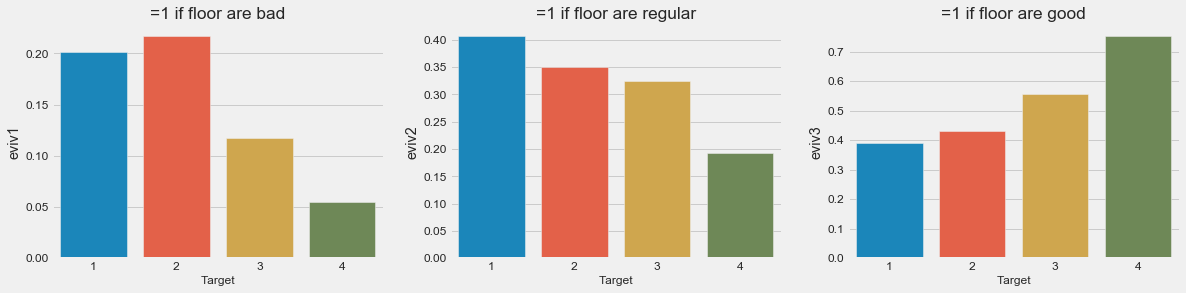

In [362]:
var = ['eviv1','eviv2','eviv3','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(3):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(1,3,figsize=(18,4))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(1,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

위 3아이템 : 확실한 상관관계을 보여준다 - 합쳐서 더 확실한 상관관계 보여줘도 될듯  
(bad=1,reg=2,good=3)

<Figure size 432x288 with 0 Axes>

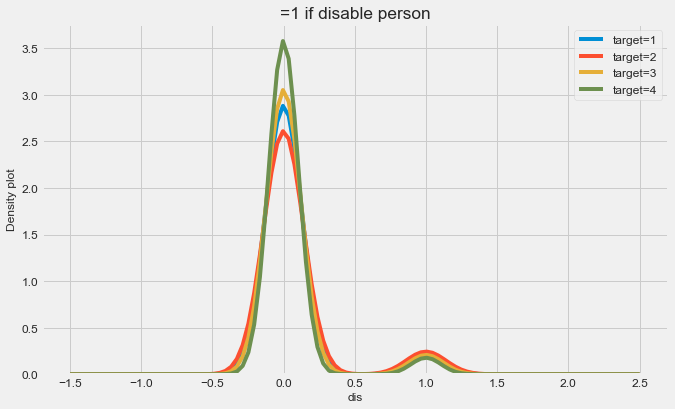

In [363]:
var = ['dis']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(1,1,figsize=(10,6))
i=0
for feature in var:
    i+=1
    plt.subplot(1,1,i)
    sns.kdeplot(t1[feature], bw=.5, label="target=1")
    sns.kdeplot(t2[feature], bw=.5, label="target=2") #bandwidth가중요
    sns.kdeplot(t3[feature], bw=.5, label="target=3")
    sns.kdeplot(t4[feature], bw=.5, label="target=4") #bandwidth가중요
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

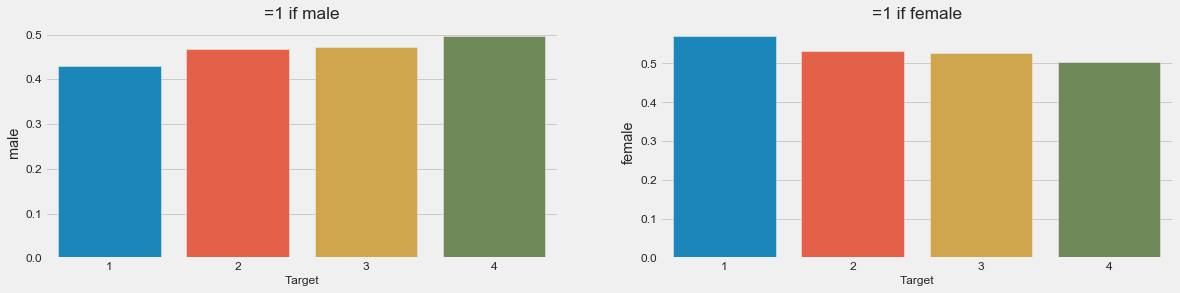

In [364]:
#완전히 seperate되는 아이템이면 이걸 쓴다
var = ['male','female','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(2):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(1,2,figsize=(18,4))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(1,2,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

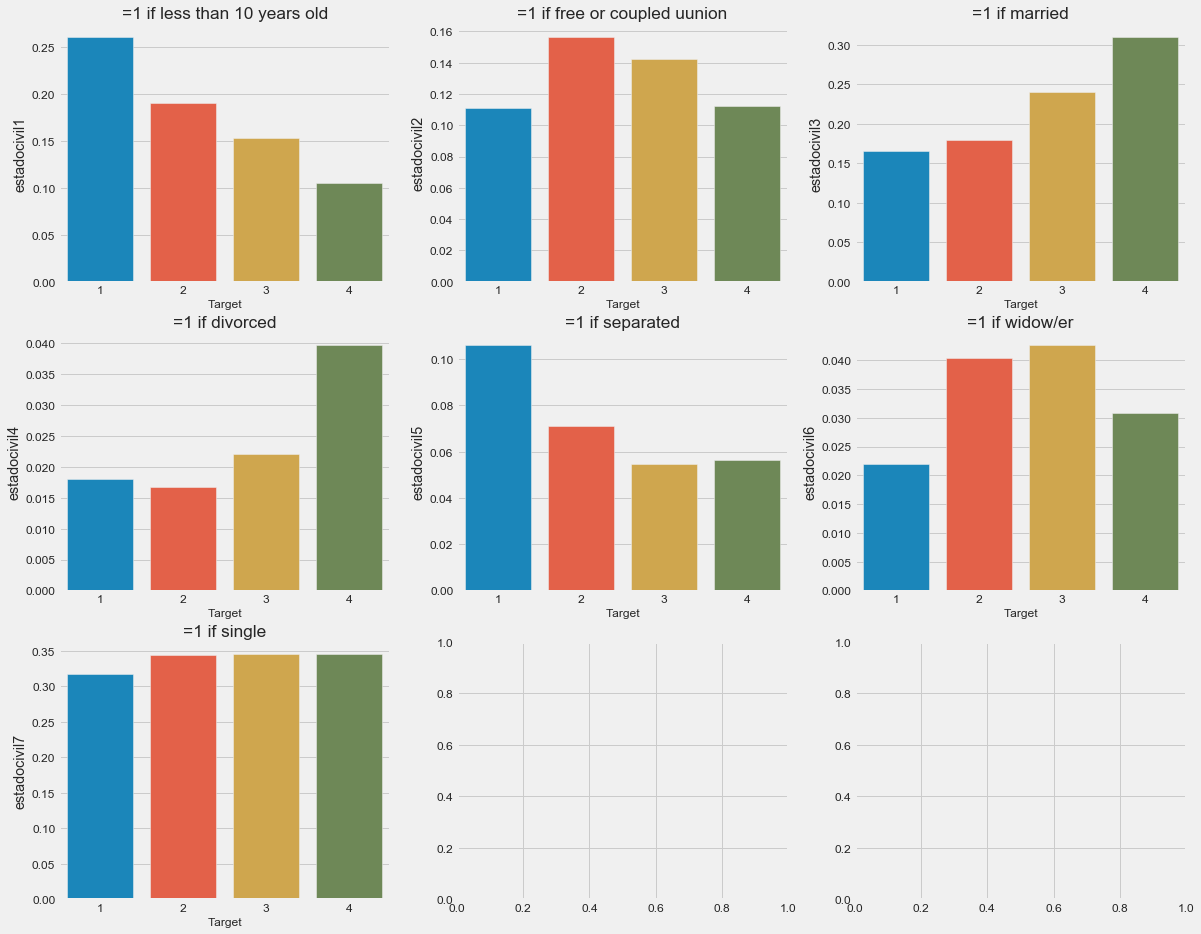

In [365]:
var = ['estadocivil1','estadocivil2','estadocivil3','estadocivil4','estadocivil5','estadocivil6','estadocivil7','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(7):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(3,3,figsize=(18,15))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(3,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

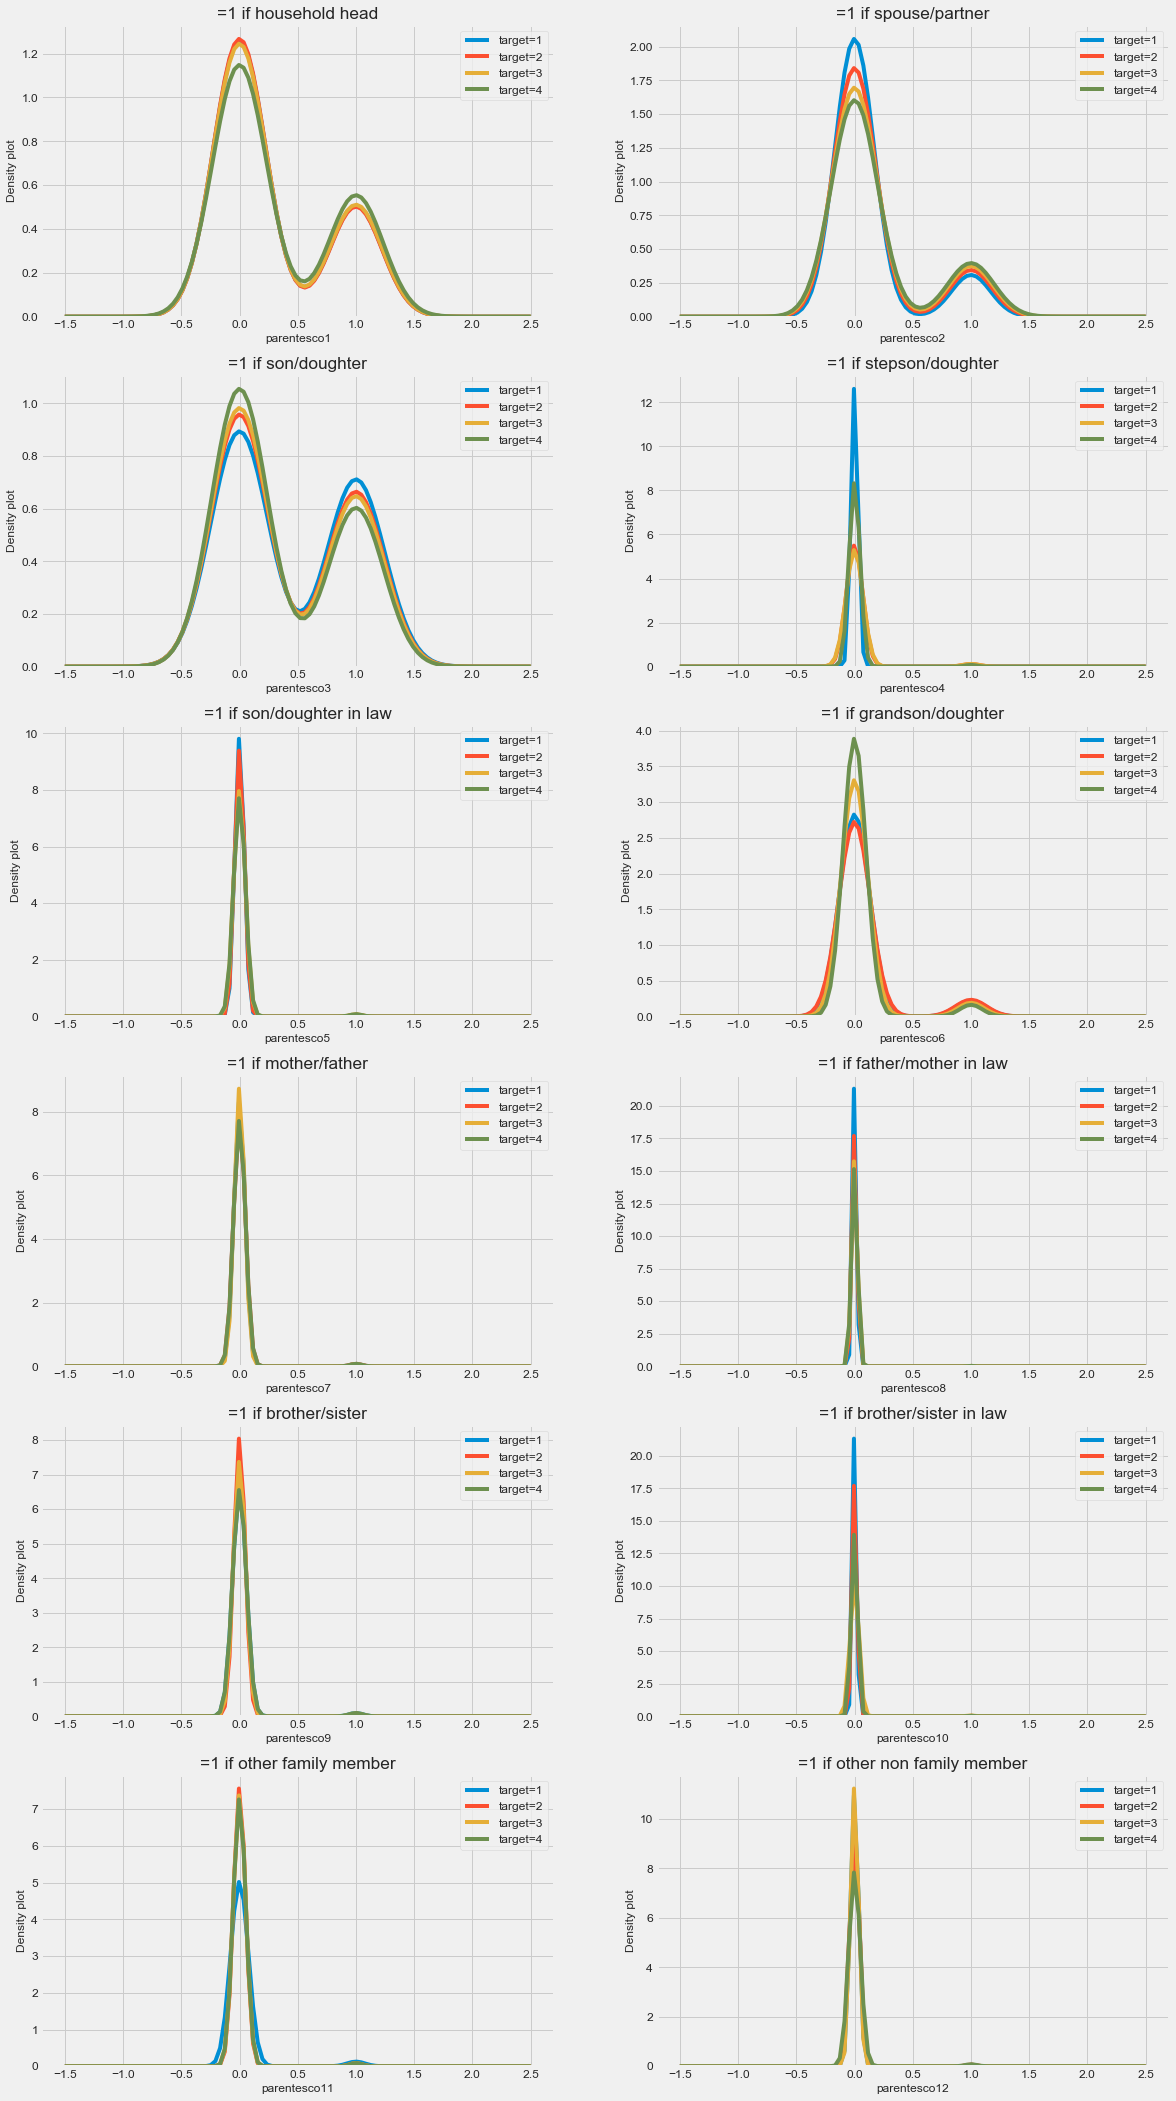

In [366]:
var = ['parentesco1','parentesco2','parentesco3','parentesco4',
       'parentesco5','parentesco6','parentesco7','parentesco8','parentesco9','parentesco10','parentesco11','parentesco12']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(6,2,figsize=(18,35))
i=0
for feature in var:
    i+=1
    plt.subplot(6,2,i)
    sns.kdeplot(t1[feature], bw=.5, label="target=1")
    sns.kdeplot(t2[feature], bw=.5, label="target=2") #bandwidth가중요
    sns.kdeplot(t3[feature], bw=.5, label="target=3")
    sns.kdeplot(t4[feature], bw=.5, label="target=4") #bandwidth가중요
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

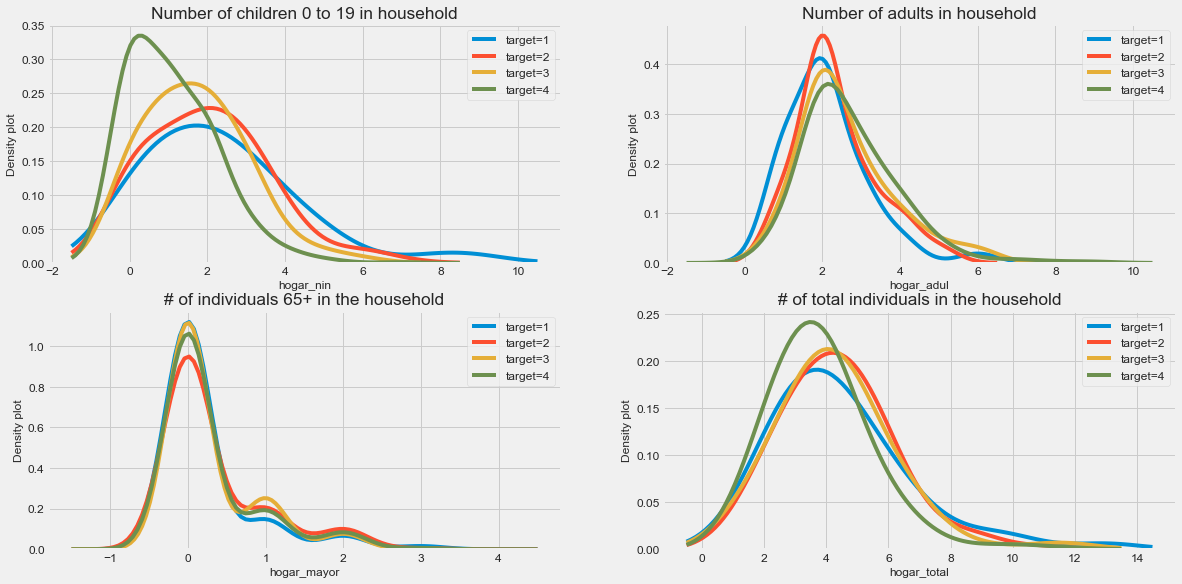

In [367]:
var = ['hogar_nin','hogar_adul','hogar_mayor','hogar_total']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(2,2,figsize=(18,9))
i=0
for feature in var:
    i+=1
    plt.subplot(2,2,i)
    sns.kdeplot(t1[feature], bw=.5, label="target=1")
    sns.kdeplot(t2[feature], bw=.5, label="target=2") #bandwidth가중요
    sns.kdeplot(t3[feature], bw=.5, label="target=3")
    sns.kdeplot(t4[feature], bw=.5, label="target=4") #bandwidth가중요
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

앞서 그렸던  
r4t1과hogar_nin이 비슷(연령대가 <12냐 <19냐 차이)  
r4t2와hogar_adul이 비슷(>12 vs >19)  
r4t3와hogar_total은 똑같

In [72]:
mapping = {'yes':1,'no':0} #dictionary로 여러개 한꺼번에 replace 할수있다!

train['dependency'] = train['dependency'].replace(mapping).astype(np.float64)
train['edjefa'] = train['edjefa'].replace(mapping).astype(np.float64)
train['edjefe'] = train['edjefe'].replace(mapping).astype(np.float64)
test['dependency'] = test['dependency'].replace(mapping).astype(np.float64)
test['edjefa'] = test['edjefa'].replace(mapping).astype(np.float64)
test['edjefe'] = test['edjefe'].replace(mapping).astype(np.float64)

train[['dependency','edjefa','edjefe']].describe()

dependency       edjefa       edjefe
count  9557.000000  9557.000000  9557.000000
mean      1.149550     2.896830     5.096788
std       1.605993     4.612056     5.246513
min       0.000000     0.000000     0.000000
25%       0.333333     0.000000     0.000000
50%       0.666667     0.000000     6.000000
75%       1.333333     6.000000     9.000000
max       8.000000    21.000000    21.000000

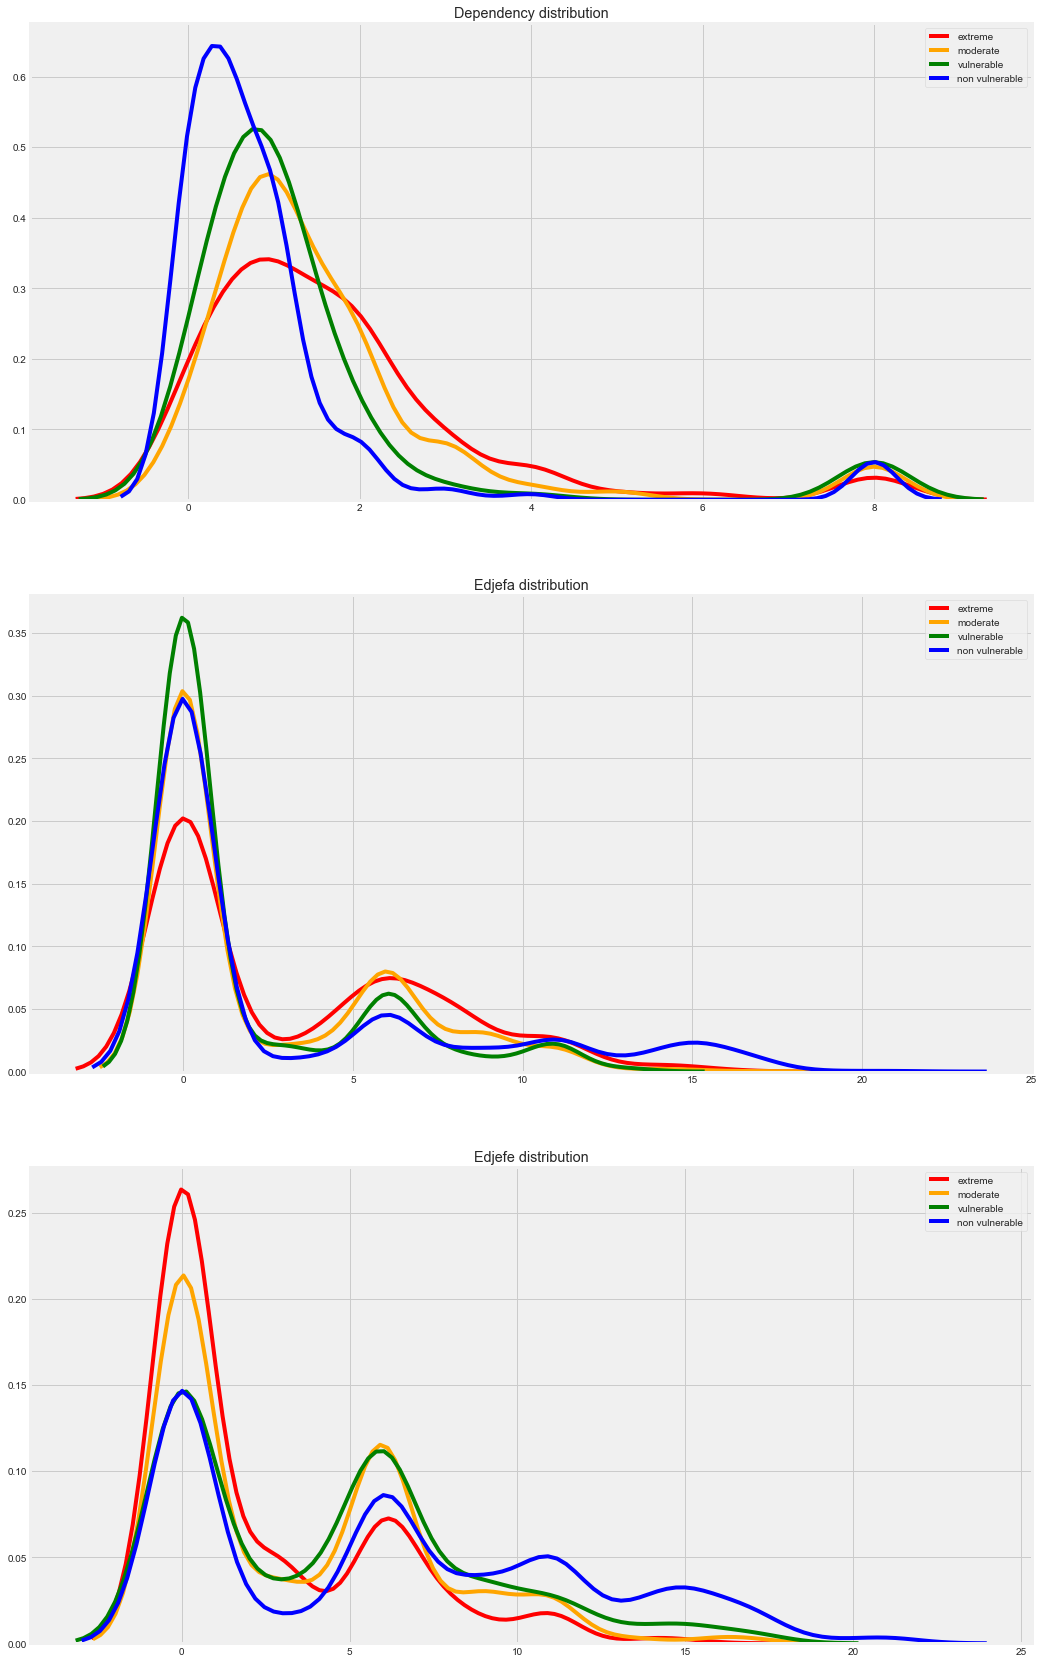

In [20]:
plt.figure(figsize=(16,12))

colors = OrderedDict({1:'red',2:'orange',3:'green',4:'blue'})
poverty = OrderedDict({1:'extreme',2:'moderate',3:'vulnerable',4:'non vulnerable'})

for i, col in enumerate(['dependency','edjefa','edjefe']):
    ax=plt.subplot(3,1,i+1)
    for pov, color in colors.items():
        sns.kdeplot(train.loc[train['Target']==pov,col].dropna(), color=color, ax=ax, 
                    label = poverty[pov])
    plt.title(f'{col.capitalize()} distribution')
plt.subplots_adjust(top=2)

education을 많이 받은 사람은 준수한 household에 살고있을 확률이 높다

<Figure size 432x288 with 0 Axes>

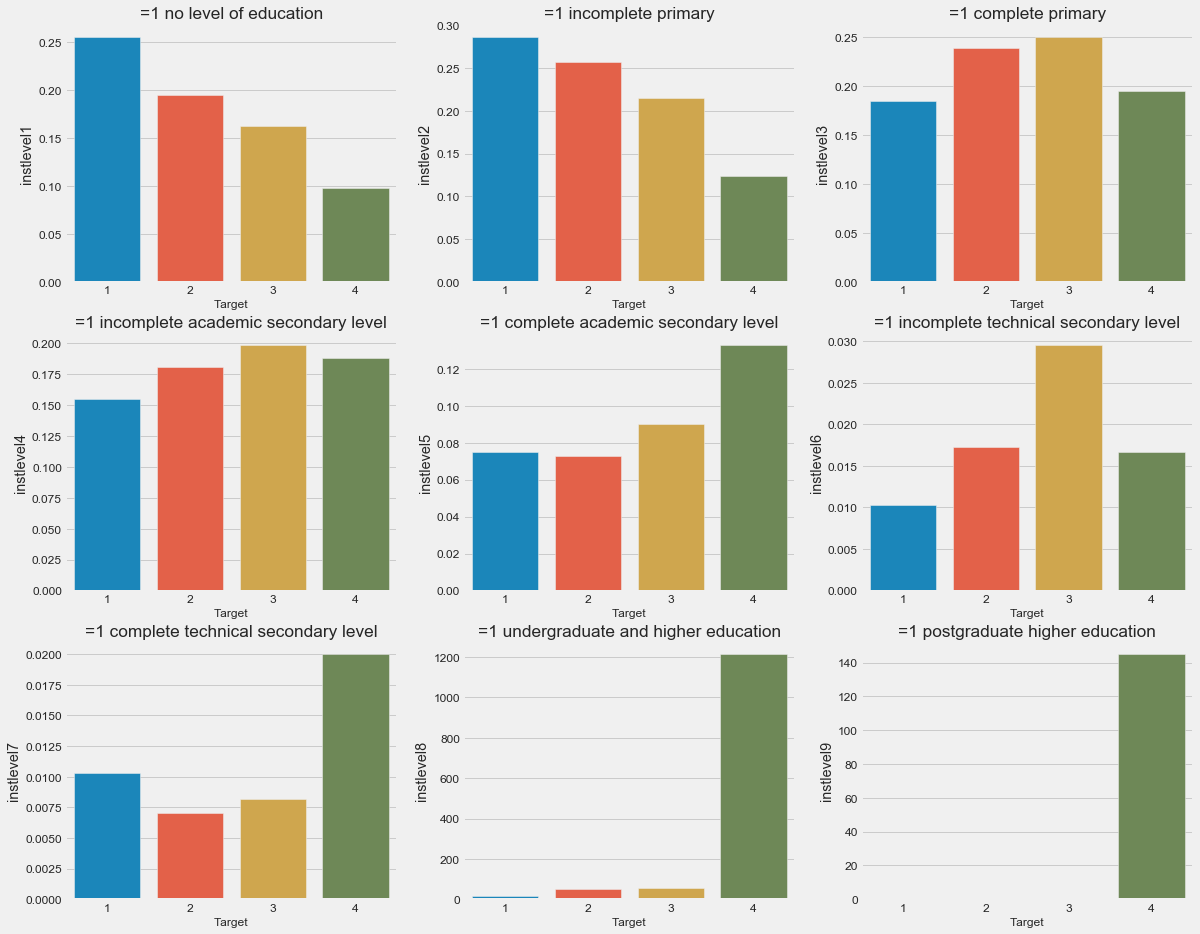

In [368]:
var = ['instlevel1','instlevel2','instlevel3','instlevel4','instlevel5','instlevel6','instlevel7','instlevel8','instlevel9','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(7):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(3,3,figsize=(18,15))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(3,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

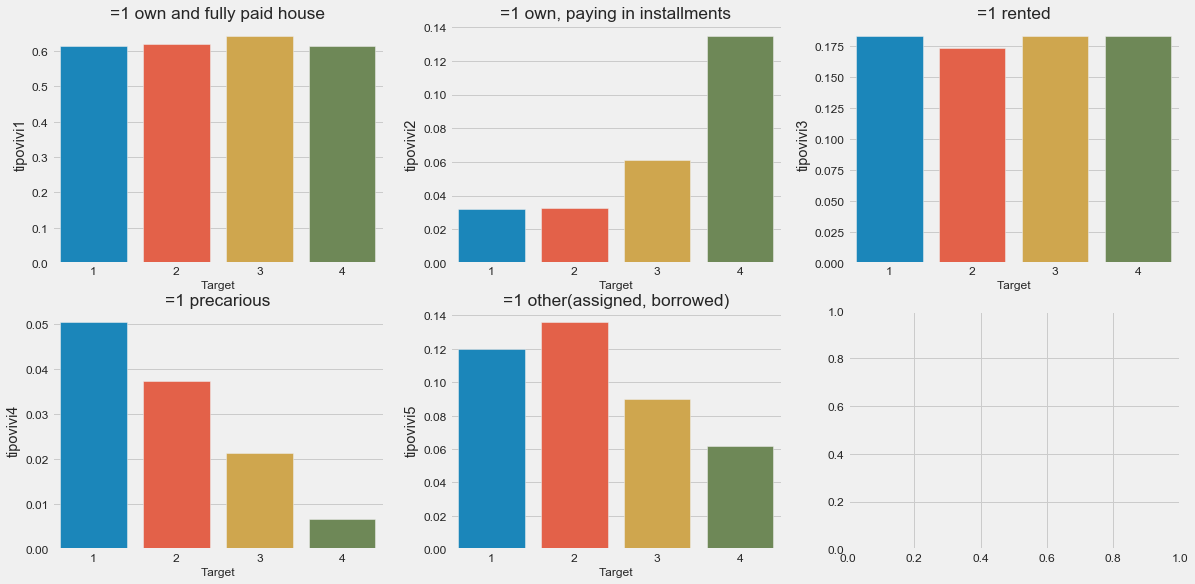

In [369]:
var = ['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(5):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(2,3,figsize=(18,9))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(2,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

precarious = 위태위태한 상황  
installments = 분할금

<Figure size 432x288 with 0 Axes>

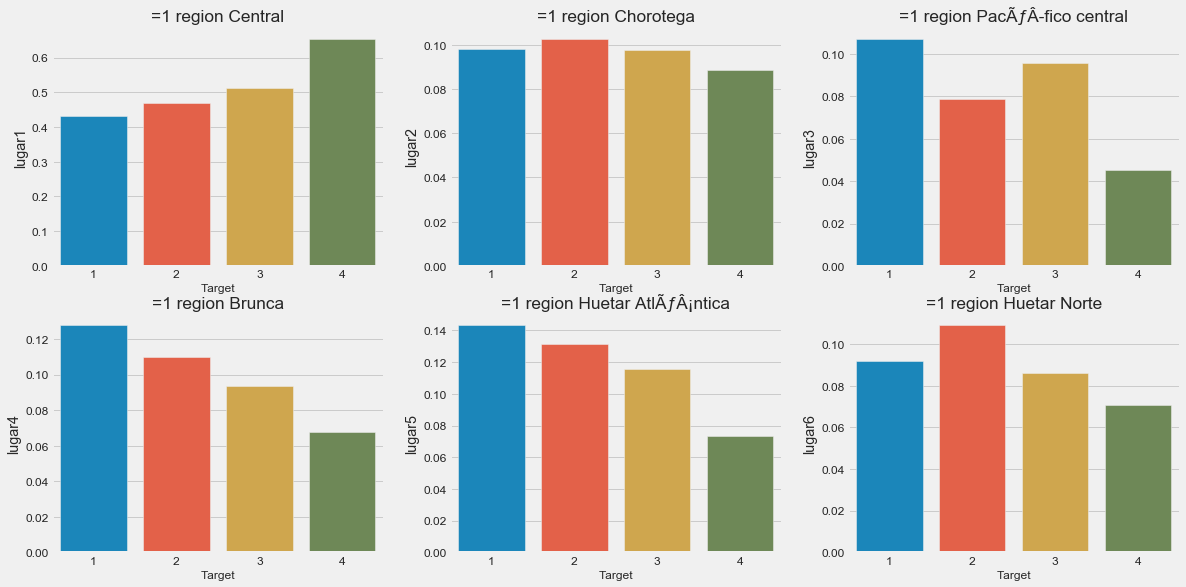

In [370]:
var = ['lugar1','lugar2','lugar3','lugar4','lugar5','lugar6','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(6):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(2,3,figsize=(18,9))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(2,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

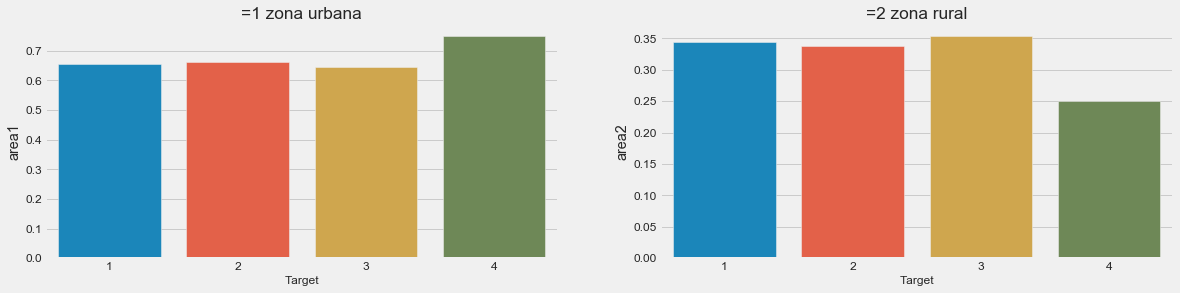

In [371]:
var = ['area1','area2','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(2):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(1,2,figsize=(18,4))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(1,2,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

도시쪽이 조금 더 잘 사는걸로.

<Figure size 432x288 with 0 Axes>

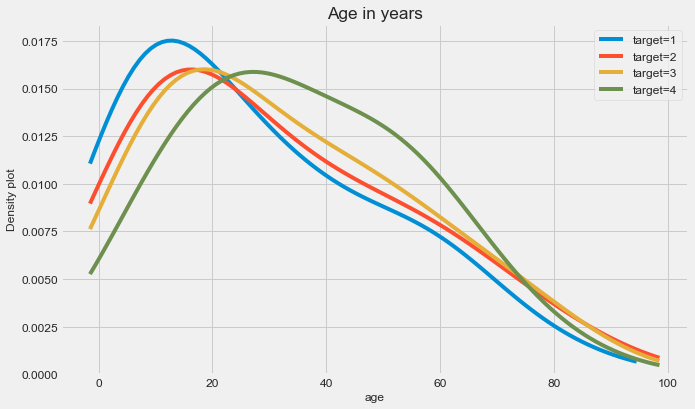

In [372]:
var = ['age']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(1,1,figsize=(10,6))
i=0
for feature in var:
    i+=1
    plt.subplot(1,1,i)
    sns.kdeplot(t1[feature], bw=.5, label="target=1")
    sns.kdeplot(t2[feature], bw=.5, label="target=2") #bandwidth가중요
    sns.kdeplot(t3[feature], bw=.5, label="target=3")
    sns.kdeplot(t4[feature], bw=.5, label="target=4") #bandwidth가중요
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

나이가 많은 사람들이 좀 더 잘 사는 편

## 2. Data Processing

In [21]:
#combine train&test - 한번에 바꾸게
test['Target']=np.nan
data= train.append(test,ignore_index=True) #row로 합쳐줌(concat이랑똑같)
data

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
0      ID_279628684  190000.0       0      3       0     1       1     0   
1      ID_f29eb3ddd  135000.0       0      4       0     1       1     1   
2      ID_68de51c94       NaN       0      8       0     1       1     0   
3      ID_d671db89c  180000.0       0      5       0     1       1     1   
4      ID_d56d6f5f5  180000.0       0      5       0     1       1     1   
5      ID_ec05b1a7b  180000.0       0      5       0     1       1     1   
6      ID_e9e0c1100  180000.0       0      5       0     1       1     1   
7      ID_3e04e571e  130000.0       1      2       0     1       1     0   
8      ID_1284f8aad  130000.0       1      2       0     1       1     0   
9      ID_51f52fdd2  130000.0       1      2       0     1       1     0   
10     ID_db44f5c59  130000.0       1      2       0     1       1     0   
11     ID_de822510c  100000.0       0      3       0     1       1     0   
12     ID_d94071d7c  100000.0       0      3       0     1       1     0   
13     ID_064b57869       NaN       0      4       0     1       1     1   
14     ID_5c837d8a4       NaN       0      4       0     1       1     1   
15     ID_0a39e419e   90000.0       1      2       0     1       1     0   
16     ID_4ff51f90c   90000.0       1      2       0     1       1     0   
17     ID_336c51386   90000.0       1      2       0     1       1     0   
18     ID_c51938edf   90000.0       1      2       0     1       1     0   
19     ID_35b66f7c6  215000.0       0      4       0     1       1     0   
20     ID_74a2bc523  215000.0       0      4       0     1       1     0   
21     ID_15d393ce7  150000.0       0      3       0     1       1     0   
22     ID_a0bff0ba7  150000.0       0      3       0     1       1     0   
23     ID_848b0fdf1  100000.0       1      1       1     0       1     0   
24     ID_298d857e5  100000.0       1      1       1     0       1     0   
25     ID_1d5bf8ddf  100000.0       1      1       1     0       1     0   
26     ID_e5cdba865       NaN       0      5       0     1       1     0   
27     ID_e18530139  120000.0       0      4       0     1       1     1   
28     ID_cba035c44  120000.0       0      4       0     1       1     1   
29     ID_b6c1c7e65  120000.0       0      4       0     1       1     1   
...             ...       ...     ...    ...     ...   ...     ...   ...   
33383  ID_2284afed9       NaN       0      1       0     0       0     0   
33384  ID_741c22332       NaN       0      4       0     1       1     0   
33385  ID_34b7a0917       NaN       0      4       0     1       1     0   
33386  ID_bd17c8581       NaN       0      4       0     1       1     0   
33387  ID_856299b40   46500.0       0      5       0     1       1     0   
33388  ID_a18de5e41   46500.0       0      5       0     1       1     0   
33389  ID_a65eaea22       NaN       0      3       0     1       1     0   
33390  ID_d66908d02       NaN       0      3       0     1       1     0   
33391  ID_268ee9091       NaN       0      3       0     1       1     0   
33392  ID_f58a259ed       NaN       0      4       0     0       0     0   
33393  ID_265b917e8       NaN       0      4       0     0       0     0   
33394  ID_8b85078ed       NaN       0      4       0     1       1     0   
33395  ID_2789c94fa       NaN       0      4       0     1       1     0   
33396  ID_da28a4a6b       NaN       0      4       0     1       1     0   
33397  ID_35185fb42       NaN       0      4       0     1       1     0   
33398  ID_19c0b1480       NaN       0      4       0     1       1     0   
33399  ID_898d44ca1       NaN       0      4       0     1       1     0   
33400  ID_aa256c594       NaN       0      5       0     1       1     0   
33401  ID_28371903e       NaN       0      5       0     1       1     0   
33402  ID_632c8e99e       NaN       0      5       0     1       1     0   
33403  ID_f0c9c06f7       NaN       1      2       1     1       

### Identify error in the data

In [26]:
#family members in same household but dif poverty level
all_equal = train.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)

not_equal = all_equal[all_equal!=True]
len(not_equal)

85

In [27]:
not_equal.head()

idhogar
0172ab1d9    False
03f4e5f4d    False
0511912b6    False
078a0b6e2    False
09e25d616    False
Name: Target, dtype: bool

In [55]:
not_equal.index

Index(['0172ab1d9', '03f4e5f4d', '0511912b6', '078a0b6e2', '09e25d616',
       '0f3e65c83', '0f9494d3a', '15a891635', '17fb04a62', '18832b840',
       '26b3a0f41', '288579c97', '28893b5e7', '2c9872b82', '2cb443214',
       '309fb7246', '30a70901d', '3c6973219', '3c73c107f', '3df651058',
       '3fe29a56b', '410194c8b', '417865404', '42ec8bef5', '43b9c83e5',
       '44f219a16', '46af47063', '4b6077882', '4c2dba109', '4dc11e11f',
       '4e19bd549', '50e064ee8', '513adb616', '54118d5d9', '55a662731',
       '564eab113', '594d3eb27', '5c3f7725d', '5c6f32bbc', '5e9329fc6',
       '614b48fb7', '636330516', '654ef7612', '67ad49822', '6833ac5dc',
       '694a0cbf4', '6a389f3de', '6bcf799cf', '6c543442a', '71cd52a80',
       '73d85d05d', '7ad269eef', '7c57f8237', '7e9d58c5c', '7ea6aca15',
       '80a66379b', '811a35744', '8242a51ec', '8420bcfca', '8ae3e74ca',
       '8bb6da3c1', '932287f5d', '9bbf7c6ca', 'a20ff33ba', 'a3288e6fa',
       'a94a45642', 'bcaa2e2f5', 'bcab69521', 'bd82509d1', 'be91

In [57]:
# gonna replace targets w/ ones of parentesco1
# 에러난 household중에서 가장이 없는덴 없는지?
t=train.groupby('idhogar')['parentesco1'].sum()
t=t.loc[t==0].index
count=0
for i in not_equal.index:
    if i in t:
        count+=1 
count

0

다행히 없다

In [77]:
for household in not_equal.index:
    train.loc[train['idhogar']==household,'Target']=train.loc[(train['idhogar']==household) & (train['parentesco1']==1),'Target'].values[0]
    print(train.loc[train['idhogar']==household,'Target'])

7651    3
7652    3
7653    3
7654    3
7655    3
Name: Target, dtype: int64
7480    1
7481    1
7482    1
Name: Target, dtype: int64
2311    4
2312    4
2313    4
2314    4
Name: Target, dtype: int64
8380    1
8381    1
8382    1
8383    1
Name: Target, dtype: int64
7589    2
7590    2
7591    2
7592    2
Name: Target, dtype: int64
7345    1
7346    1
7347    1
Name: Target, dtype: int64
511    2
512    2
513    2
514    2
515    2
Name: Target, dtype: int64
5509    1
5510    1
5511    1
Name: Target, dtype: int64
6548    2
6549    2
6550    2
Name: Target, dtype: int64
6755    3
6756    3
6757    3
6758    3
6759    3
Name: Target, dtype: int64
3616    3
3617    3
3618    3
Name: Target, dtype: int64
5367    1
5368    1
5369    1
Name: Target, dtype: int64
8491    3
8492    3
8493    3
8494    3
Name: Target, dtype: int64
8630    1
8631    1
8632    1
8633    1
8634    1
8635    1
Name: Target, dtype: int64
4812    3
4813    3
Name: Target, dtype: int64
7522    3
7523    3
7524    3


#### drop columns with too many missing values

In [81]:
data= train.append(test,ignore_index=True)
df=pd.DataFrame(data.isnull().sum())
df.sort_values(by=[0],ascending=False).head(10)

0
rez_esc      27581
v18q1        25468
v2a1         24263
Target       23856
meaneduc        36
SQBmeaned       36
parentesco7      0
parentesco2      0
parentesco3      0
parentesco4      0

In [82]:
data=data.drop(['rez_esc','v18q1','v2a1'],axis=1)

In [172]:
data[data.meaneduc.isnull()]

Id  Target  abastaguadentro  abastaguafuera  abastaguano  \
1291   ID_bd8e11b0f     4.0                1               0            0   
1840   ID_46ff87316     4.0                1               0            0   
1841   ID_69f50bf3e     4.0                1               0            0   
2049   ID_db3168f9f     4.0                1               0            0   
2050   ID_2a7615902     4.0                1               0            0   
9561   ID_a62966799     NaN                1               0            0   
10092  ID_ab0fe3b38     NaN                1               0            0   
10093  ID_4f297efe7     NaN                1               0            0   
10094  ID_b41dee3bb     NaN                1               0            0   
12169  ID_ad3389376     NaN                1               0            0   
12170  ID_2586969c3     NaN                1               0            0   
16366  ID_fd724fb68     NaN                1               0            0   
16367  ID_7f6900abb     NaN                1               0            0   
16823  ID_84ddecd60     NaN                1               0            0   
16824  ID_871fe4f99     NaN                1               0            0   
25365  ID_429347654     NaN                1               0            0   
25366  ID_a653d8af0     NaN                1               0            0   
25367  ID_1a8267691     NaN                1               0            0   
25653  ID_001f64a5e     NaN                1               0            0   
25654  ID_8bacb73f8     NaN                1               0            0   
25848  ID_b3909c11b     NaN                1               0            0   
28978  ID_ed115c476     NaN                1               0            0   
29542  ID_f397839d5     NaN                1               0            0   
30693  ID_eecce8c2c     NaN                0               0            1   
30694  ID_b02058c34     NaN                0               0            1   
31201  ID_807b89eee     NaN                0               1            0   
31202  ID_e01092844     NaN                0               1            0   
31381  ID_fe7a70a02     NaN                1               0            0   
31382  ID_61b2a9119     NaN                1               0            0   
31383  ID_0f44acff6     NaN                1               0            0   
31384  ID_f108e05b8     NaN                1               0            0   
31682  ID_e70eded8e     NaN                1               0            0   
31683  ID_e847df784     NaN                1               0            0   
31893  ID_e0b8441d1     NaN                1               0            0   
31894  ID_66092cc9d     NaN                1               0            0   
31895  ID_684d6f6ee     NaN                1               0            0   

       age  area1  area2  bedrooms  cielorazo  ...   techootro  techozinc  \
1291    18      1      0         5          1  ...           0          1   
1840    18      1      0         1          1  ...           0          1   
1841    18      1      0         1          1  ...           0          1   
2049    19      1      0         2          1  ...           0          1   
2050    19      1      0         2          1  ...           0          1   
9561    18      1      0         2          1  ...           0          1   
10092   18      1      0         4          1  ...           0          1   
10093   19      1      0         2          1  ...           0          1   
10094   19      1      0         2          1  ...           0          1   
12169   19      1      0         1          1  ...           0          0   
12170   17      1      0         1          1  ...           0          0   
16366   18      1      0         2          1  ...           0          1   
16367   19      1      0         2          1  ...           0          1   
16823   19      1      0         1          1  ...           0          1   
16824   18  

In [173]:
t4=train.loc[train['Target']==4]
t4.meaneduc.mean()

10.370765755187529

In [180]:
data.loc[(data.Target.notnull()) & (data.meaneduc.isnull()),'meaneduc']=10.37

#### Data를 개인/household 단위로 나누기

In [225]:
#define variable categories

id_ = ['Id','idhogar','Target']

ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']

ind_ordered = ['escolari', 'age']

hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone'] #qmoilephone=집내전화수

hh_cont = [ 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [226]:
# data= data.drop(['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
#         'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq'],axis=1)

### a) household variables

In [182]:
# use 가장 data only(겹칠거니깐)

heads = data.loc[data['parentesco1']==1,:]
heads = heads[id_+hh_bool+hh_cont+hh_ordered]
heads.shape

(10307, 96)

#### drop redundant variables

In [183]:
#redundant variables - 변수 간 corr 0.95 넘으면 하나만 남겨줄거임

corr_matrix = heads.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [184]:
corr_matrix.loc[corr_matrix['tamhog'].abs()>0.9, corr_matrix['tamhog'].abs()>0.9]

r4t3    tamhog    tamviv    hhsize  hogar_total
r4t3         1.000000  0.998287  0.910457  0.998287     0.998287
tamhog       0.998287  1.000000  0.909155  1.000000     1.000000
tamviv       0.910457  0.909155  1.000000  0.909155     0.909155
hhsize       0.998287  1.000000  0.909155  1.000000     1.000000
hogar_total  0.998287  1.000000  0.909155  1.000000     1.000000

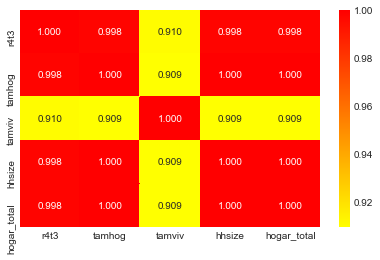

In [185]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs()>0.9, corr_matrix['tamhog'].abs()>0.9],
           annot = True, cmap = plt.cm.autumn_r,fmt='.3f')

In [186]:
heads = heads.drop(['r4t3','tamhog','hogar_total'],axis=1)

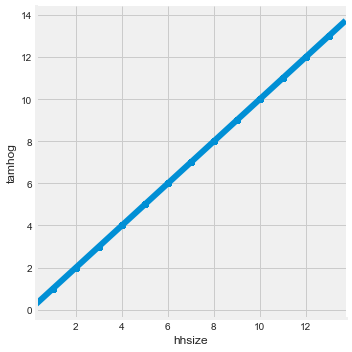

In [187]:
sns.lmplot('hhsize','tamhog',data)

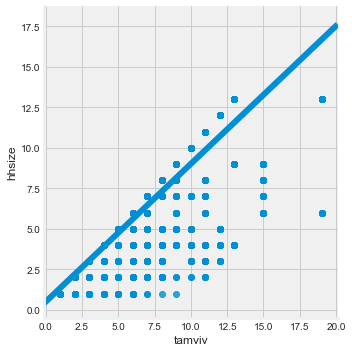

In [188]:
sns.lmplot('tamviv','hhsize',data)

In [189]:
corr_matrix.loc[corr_matrix['coopele'].abs()>0.9, corr_matrix['coopele'].abs()>0.9]

public   coopele
public   1.000000 -0.967759
coopele -0.967759  1.000000

In [190]:
corr_matrix.loc[corr_matrix['area2'].abs()>0.9, corr_matrix['area2'].abs()>0.9]
#rural vs urban 인데, urban 가지고 있으면 rural이기때문에 하나는 없애준다

area1  area2
area1    1.0   -1.0
area2   -1.0    1.0

In [191]:
heads=heads.drop(['area2'],axis=1)

#### make dummy to ordinal
왜? dummy인데 의미가 있음 ex) bad-regular-good은 0,1,2 척도로 나타내면 굳

In [192]:
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]),
                           axis = 1)  #3개중 제일 큰 곳의 위치를 반환(1인곳.column기준)

heads = heads.drop(columns = ['epared1', 'epared2', 'epared3'])

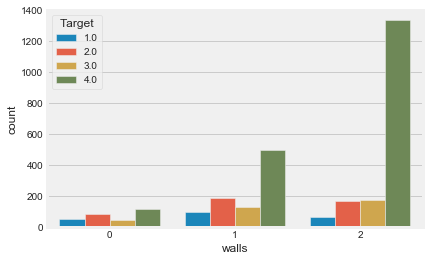

In [193]:
sns.countplot(x='walls',data=heads,hue='Target')

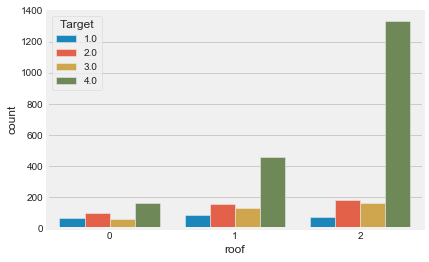

In [194]:
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]),
                           axis = 1)
heads = heads.drop(columns = ['etecho1', 'etecho2', 'etecho3'])
sns.countplot(x='roof',data=heads,hue='Target')

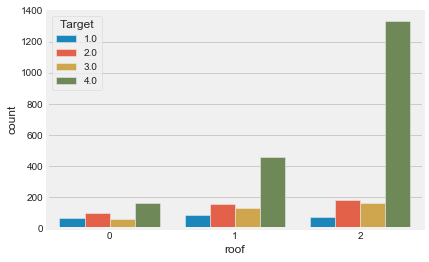

In [195]:
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]),
                           axis = 1)
heads = heads.drop(columns = ['eviv1', 'eviv2', 'eviv3'])
sns.countplot(x='roof',data=heads,hue='Target')

<Figure size 432x288 with 0 Axes>

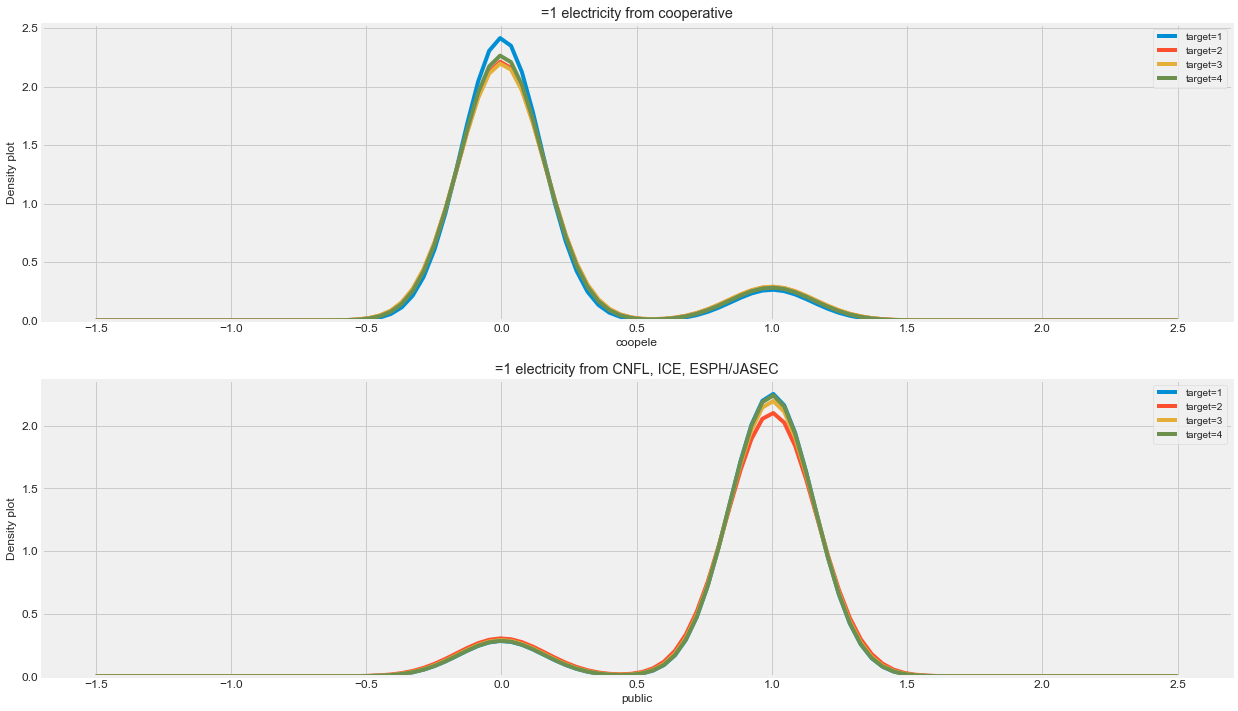

In [197]:
var = ['coopele','public']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(2,1,figsize=(19,12))
i=0
for feature in var:
    i+=1
    plt.subplot(2,1,i)
    sns.kdeplot(t1[feature], bw=.5, label="target=1")
    sns.kdeplot(t2[feature], bw=.5, label="target=2") #bandwidth가중요
    sns.kdeplot(t3[feature], bw=.5, label="target=3")
    sns.kdeplot(t4[feature], bw=.5, label="target=4") #bandwidth가중요
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

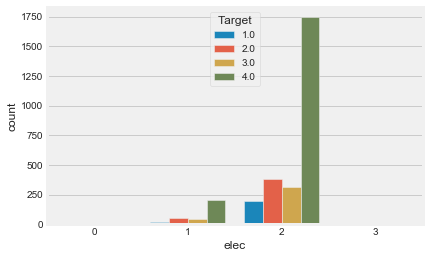

In [198]:
heads['elec'] = np.argmax(np.array(heads[['noelec','coopele','public','planpri']]),
                           axis = 1)
heads = heads.drop(columns = ['noelec','coopele','public','planpri'])
sns.countplot(x='elec',data=heads,hue='Target')

#### + Feature Construction (비슷한 내용을 묶어서 더 강력한 설명변수 만들기)
상관관계를 더 키우기 위해, 새로 만든 세개 feature를 합칠수도 있다.

In [199]:
#1. 평판columns 합쳐서
heads['walls+roof+floor'] = heads['walls']+heads['roof']+heads['floor']  #df column끼리 더하면 더해짐

In [200]:
pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize=True)).rename(columns={'Target':'Normalized Count'}).reset_index()

walls+roof+floor  Target  Normalized Count
0                  0     4.0          0.376404
1                  0     2.0          0.320225
2                  0     1.0          0.162921
3                  0     3.0          0.140449
4                  1     4.0          0.323529
5                  1     2.0          0.264706
6                  1     1.0          0.220588
7                  1     3.0          0.191176
8                  2     4.0          0.409449
9                  2     2.0          0.220472
10                 2     1.0          0.196850
11                 2     3.0          0.173228
12                 3     4.0          0.496269
13                 3     2.0          0.229478
14                 3     3.0          0.149254
15                 3     1.0          0.125000
16                 4     4.0          0.620805
17                 4     2.0          0.177852
18                 4     3.0          0.147651
19                 4     1.0          0.053691
20                 5     4.0          0.650602
21                 5     2.0          0.138554
22                 5     3.0          0.135542
23                 5     1.0          0.075301
24                 6     4.0          0.799163
25                 6     3.0          0.087866
26                 6     2.0          0.081590
27                 6     1.0          0.031381

In [201]:
# 2. No toilet, no electricity, no floor, no water service, no ceiling
heads['warning'] = 1 * (heads['sanitario1'] + 
                         (heads['elec'] == 0) + 
                         heads['pisonotiene'] + 
                         heads['abastaguano'] + 
                         (heads['cielorazo'] == 0))
heads['warning'].head()

0    0
1    0
2    0
5    0
8    0
Name: warning, dtype: int64

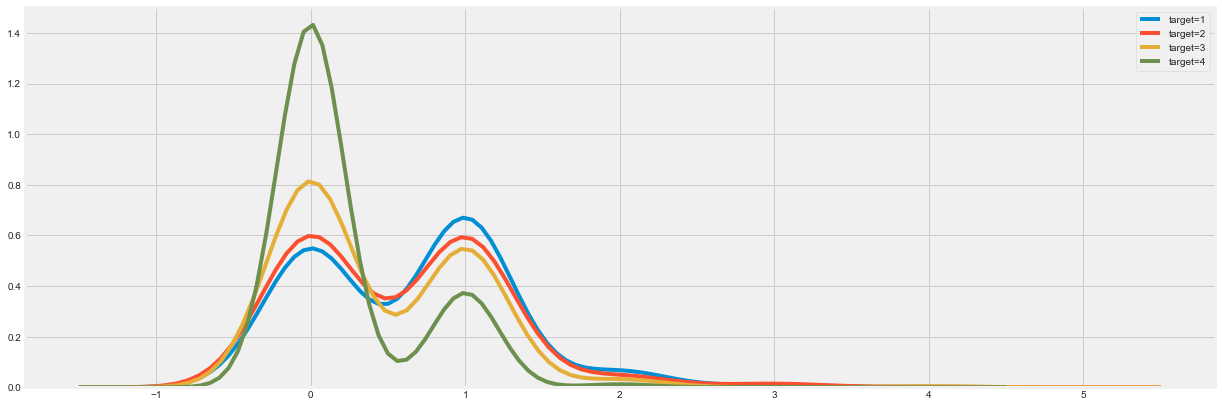

In [202]:
plt.figure(figsize=(19,7))
t1= heads.loc[heads['Target']==1]
t2=heads.loc[heads['Target']==2]
t3=heads.loc[heads['Target']==3]
t4=heads.loc[heads['Target']==4]

sns.kdeplot(t1['warning'], bw=.5, label="target=1")
sns.kdeplot(t2['warning'], bw=.5, label="target=2") #bandwidth가중요
sns.kdeplot(t3['warning'], bw=.5, label="target=3")
sns.kdeplot(t4['warning'], bw=.5, label="target=4") #bandwidth가중요

In [203]:
# 3.  Owns a refrigerator, computer, tablet, and television
heads['bonus'] = 1 * (heads['refrig'] + 
                         heads['computer'] + 
                         heads['television'] ) #qmobilephone은 양적 category라 뺐다
heads['bonus'].head()

0    1
1    1
2    1
5    1
8    1
Name: bonus, dtype: int64

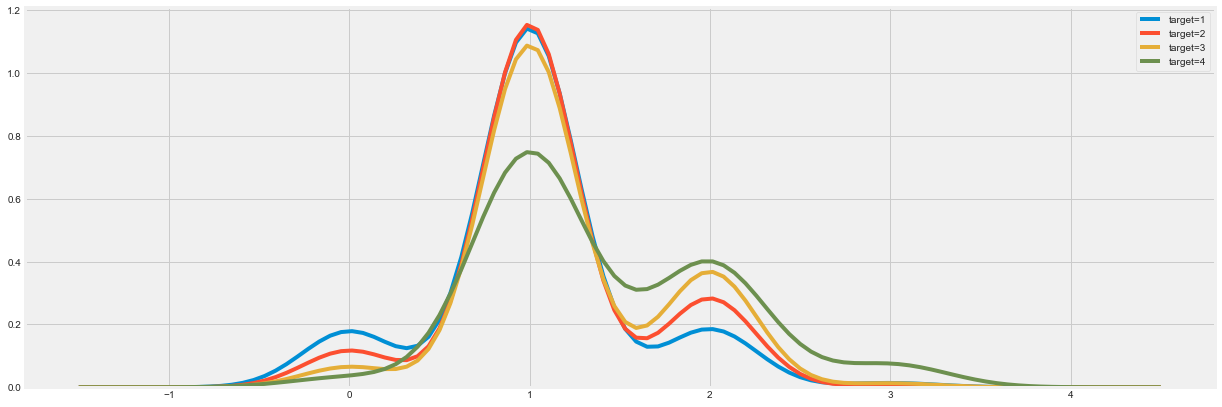

In [204]:
plt.figure(figsize=(19,7))
t1= heads.loc[heads['Target']==1]
t2=heads.loc[heads['Target']==2]
t3=heads.loc[heads['Target']==3]
t4=heads.loc[heads['Target']==4]

sns.kdeplot(t1['bonus'], bw=.5, label="target=1")
sns.kdeplot(t2['bonus'], bw=.5, label="target=2") #bandwidth가중요
sns.kdeplot(t3['bonus'], bw=.5, label="target=3")
sns.kdeplot(t4['bonus'], bw=.5, label="target=4") #bandwidth가중요

In [205]:
#4. per capita
heads['phones-per-capita']=heads['qmobilephone']/heads['tamviv']
heads['rooms-per-capita']=heads['rooms']/heads['tamviv']

#### Measuring correlations

- The Pearson Correlation: from -1 to 1 measuring the linear relationship between two variables  
- The Spearman Correlation: from -1 to 1 measuring the monotonic relationship between two variables  

Spearman은 완벽한 linear가 아니여도 1값이 나올수 있음. Pearson은 완벽히 linear해야 1값이 나옴.

In [212]:
#Pearson Correlation of targets with every column
train_heads = heads.loc[heads['Target'].notnull(),:].copy()
s=train_heads.corr()['Target'].sort_values() #전체 corr한 matrix에서 target column만 떼어온다
pcorrs = pd.DataFrame(s).rename(columns={'Target':'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns={'index':'feature'})
print(pcorrs.head())
print(pcorrs.dropna().tail())

        feature     pcorr
0       warning -0.302588
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4          r4m1 -0.209479
              feature     pcorr
80  phones-per-capita  0.299026
81              floor  0.307605
82   walls+roof+floor  0.332446
83           meaneduc  0.333750
84             Target  1.000000


In [207]:
#spearman correlation
from scipy.stats import spearmanr

feats = []
scorr= []
pvalues = []

for c in heads: #column 반복
    if heads[c].dtype!='object':
        feats.append(c)
        
        scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
        pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue)
        
scorrs = pd.DataFrame({'feature':feats,'scorr':scorr,'pvalue':pvalues}).sort_values('scorr')

In [208]:
scorrs.head()

feature     scorr        pvalue
82      warning -0.307562  3.685591e-66
56   dependency -0.281516  2.792620e-55
72    hogar_nin -0.236225  5.567218e-39
68         r4t1 -0.219226  1.112230e-33
8   pisocemento -0.209387  8.270816e-31

In [209]:
scorrs.dropna().tail()

feature     scorr         pvalue
79              floor  0.309638   4.466091e-67
84  phones-per-capita  0.337377   4.760104e-80
81   walls+roof+floor  0.338791   9.539346e-81
59           meaneduc  0.379798  1.227812e-102
0              Target  1.000000   0.000000e+00

In [213]:
corrs = pcorrs.merge(scorrs, on ='feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']
corrs.sort_values('diff').head()

feature     pcorr     scorr         pvalue      diff
66   rooms-per-capita  0.152185  0.223303   6.521453e-35 -0.071119
83           meaneduc  0.333750  0.379798  1.227812e-102 -0.046048
2                r4t1 -0.260917 -0.219226   1.112230e-33 -0.041691
80  phones-per-capita  0.299026  0.337377   4.760104e-80 -0.038351
4                r4m1 -0.209479 -0.171953   3.649343e-21 -0.037526

In [214]:
corrs.sort_values('diff').dropna().tail()

feature     pcorr     scorr        pvalue      diff
47    techozinc  0.014357  0.003404  8.528369e-01  0.010954
41  hogar_mayor -0.025173 -0.041722  2.290994e-02  0.016549
74       edjefe  0.235687  0.214736  2.367521e-32  0.020951
55       edjefa  0.052310  0.005114  7.804715e-01  0.047197
12   dependency -0.126465 -0.281516  2.792620e-55  0.155051

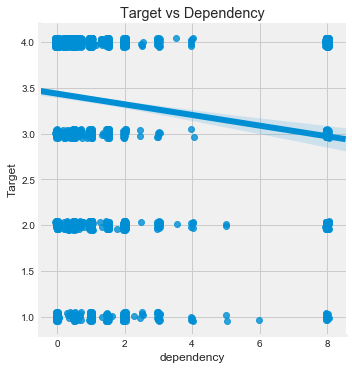

In [215]:
#dependency가 pcorr,scorr차이 제일 큼
sns.lmplot('dependency', 'Target', fit_reg = True, data = train_heads, x_jitter=0.05, y_jitter=0.05);
plt.title('Target vs Dependency'); #line을 만들기 위해서 jitter를 주었다

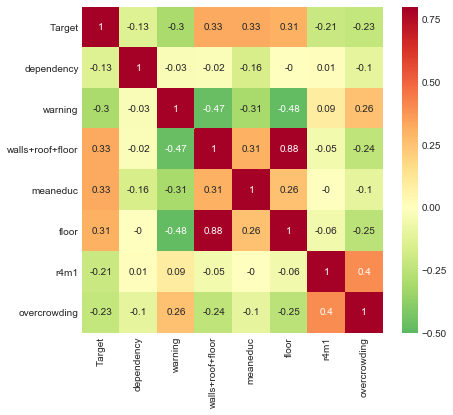

In [219]:
#correlation of the top 7 variables between themselves and target
variables = ['Target','dependency','warning','walls+roof+floor','meaneduc','floor',
            'r4m1','overcrowding']

corr_mat = train_heads[variables].corr().round(2)

plt.figure(figsize = (6,6))
sns.heatmap(corr_mat, vmin = -0.5, vmax = 0.8, center = 0,
           cmap = plt.cm.RdYlGn_r, annot=True)

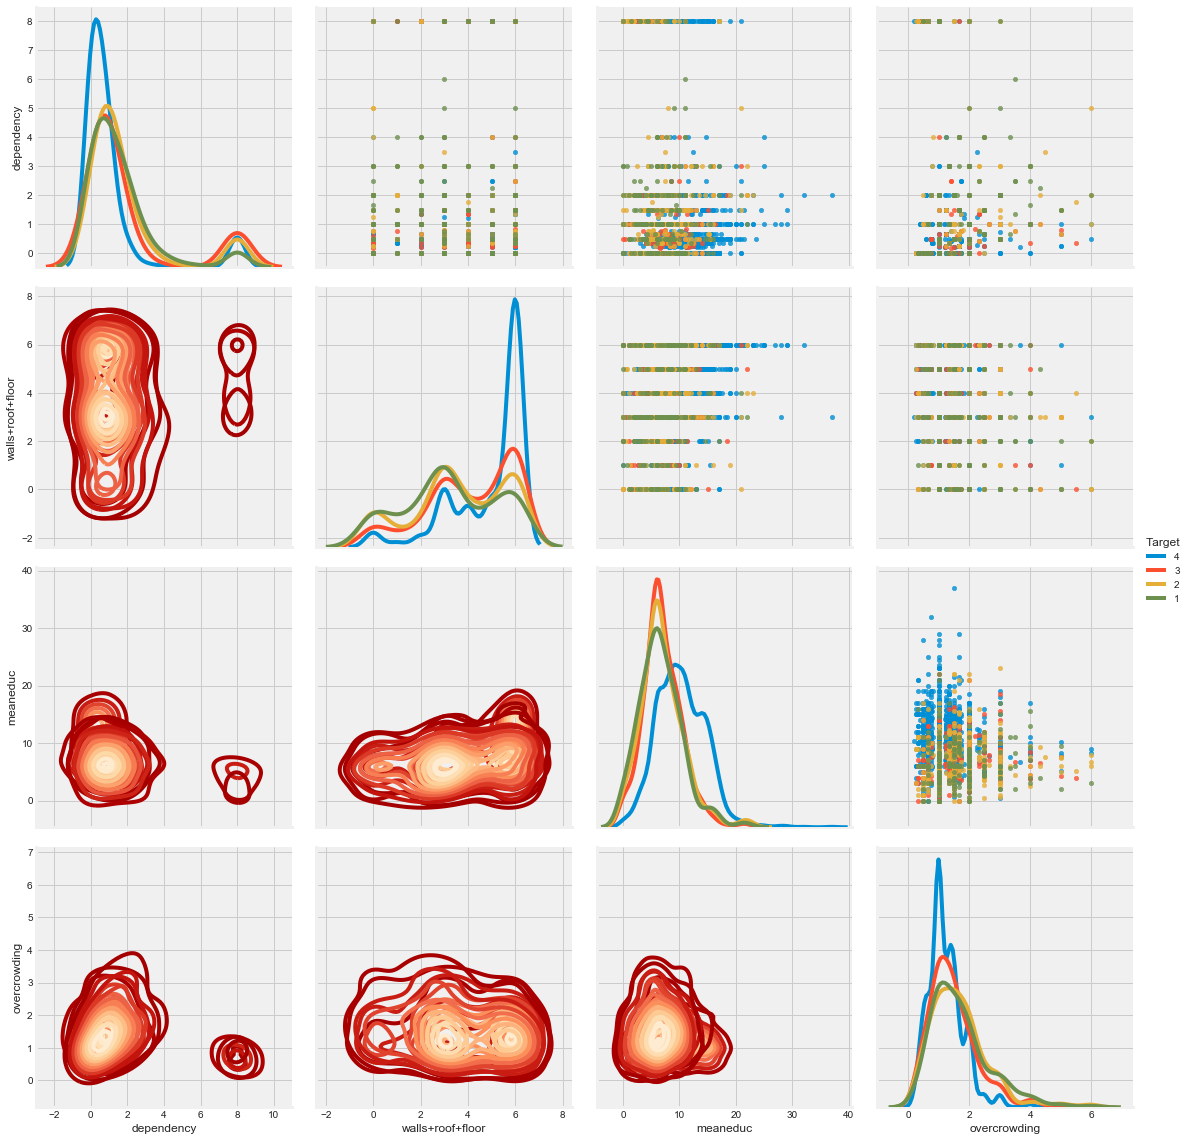

In [222]:
# plot most correlated variables
plot_data = train_heads[['Target','dependency','walls+roof+floor','meaneduc','overcrowding']]

grid = sns.PairGrid(data = plot_data, height=4, diag_sharey =False,
                   hue='Target',hue_order=[4,3,2,1],
                   vars=[x for x in list(plot_data.columns) if x!='Target'])

# scatterplots on the upper triangle
grid.map_upper(plt.scatter,alpha=0.8,s=20) #alpha=투명도

# kernel density estimate plots on the diagonal
grid.map_diag(sns.kdeplot)

# 2D KDE plots on the lower triangle
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)
grid = grid.add_legend()

In [223]:
household_feats = list(heads.columns)

### b) individual Level  Variables
(아까했던거랑 똑같이)

In [227]:
ind = data[id_ + ind_bool + ind_ordered]
ind.shape

(33413, 38)

In [228]:
corr_matrix = ind.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column])>0.95)]
to_drop

['female']

In [229]:
corr_matrix.loc[corr_matrix['female'].abs()>0.9, corr_matrix['female'].abs()>0.9]

male  female
male     1.0    -1.0
female  -1.0     1.0

In [230]:
ind = ind.drop(columns = 'male')

#### Create new features

In [231]:
ind[[c for c in ind if c.startswith('instl')]].head() #amount of instruction

instlevel1  instlevel2  instlevel3  instlevel4  instlevel5  instlevel6  \
0           0           0           0           1           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           1           0   
3           0           0           0           1           0           0   
4           0           0           0           0           1           0   

   instlevel7  instlevel8  instlevel9  
0           0           0           0  
1           0           1           0  
2           0           0           0  
3           0           0           0  
4           0           0           0

In [235]:
ind['inst']=np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]),axis=1)

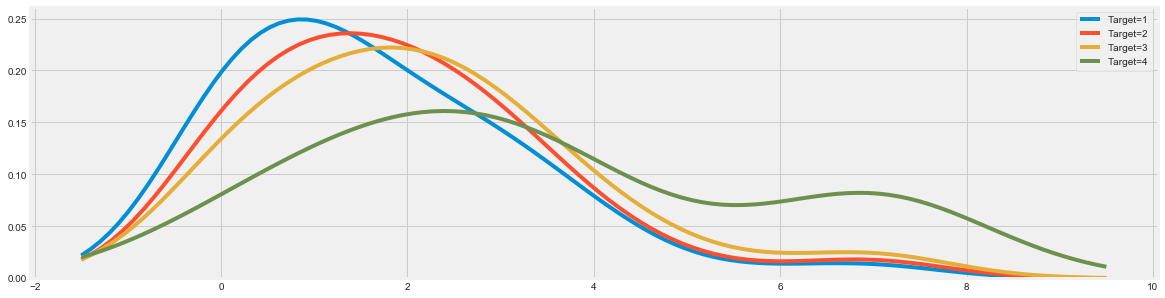

In [240]:
plt.figure(figsize=(18,5))
t1 = ind[ind['Target']==1]
t2 = ind[ind['Target']==2]
t3 = ind[ind['Target']==3]
t4 = ind[ind['Target']==4]

sns.kdeplot(t1['inst'], bw=.5,label="Target=1")
sns.kdeplot(t2['inst'],bw=.5,label="Target=2")
sns.kdeplot(t3['inst'],bw=.5,label="Target=3")
sns.kdeplot(t4['inst'],bw=.5,label="Target=4")

In [244]:
ind=ind.drop([c for c in ind if c.startswith('instl')],axis=1)

In [245]:
ind['tech']=ind['v18q']+ind['mobilephone']

### 3. aggregation
individual 을 household 단위로 합쳐야함 - idhogar, agg함수 사용
분포 자체를 입력해버린다

In [246]:
range_=lambda x: x.max()-x.min()
range_.__name__='range_'

ind_agg = ind.drop(columns='Target').groupby('idhogar').agg(['min','max','sum','count','std',range_])
ind_agg.head()

v18q                           dis                ...   inst        \
           min max sum count  std range_ min max sum count  ...    sum count   
idhogar                                                     ...                
000a08204    1   1   3     3  0.0      0   0   0   0     3  ...     14     3   
000bce7c4    0   0   0     2  0.0      0   0   1   1     2  ...      1     2   
001845fb0    0   0   0     4  0.0      0   0   0   0     4  ...     16     4   
001ff74ca    1   1   2     2  0.0      0   0   0   0     2  ...      7     2   
003123ec2    0   0   0     4  0.0      0   0   0   0     4  ...      5     4   

                           tech                            
                std range_  min max sum count  std range_  
idhogar                                                    
000a08204  4.041452      7    2   2   6     3  0.0      0  
000bce7c4  0.707107      1    1   1   2     2  0.0      0  
001845fb0  2.160247      5    1   1   4     4  0.0      0  
001ff74ca  4.949747      7    2   2   4     2  0.0      0  
003123ec2  1.500000      3    1   1   4     4  0.0      0  

[5 rows x 162 columns]

In [247]:
# Rename the columns
new_col = []
for c in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_col.append(f'{c}-{stat}')
        
ind_agg.columns = new_col
ind_agg.head()

v18q-min  v18q-max  v18q-sum  v18q-count  v18q-std  v18q-range_  \
idhogar                                                                      
000a08204         1         1         3           3       0.0            0   
000bce7c4         0         0         0           2       0.0            0   
001845fb0         0         0         0           4       0.0            0   
001ff74ca         1         1         2           2       0.0            0   
003123ec2         0         0         0           4       0.0            0   

           dis-min  dis-max  dis-sum  dis-count     ...       inst-sum  \
idhogar                                             ...                  
000a08204        0        0        0          3     ...             14   
000bce7c4        0        1        1          2     ...              1   
001845fb0        0        0        0          4     ...             16   
001ff74ca        0        0        0          2     ...              7   
003123ec2        0        0        0          4     ...              5   

           inst-count  inst-std  inst-range_  tech-min  tech-max  tech-sum  \
idhogar                                                                      
000a08204           3  4.041452            7         2         2         6   
000bce7c4           2  0.707107            1         1         1         2   
001845fb0           4  2.160247            5         1         1         4   
001ff74ca           2  4.949747            7         2         2         4   
003123ec2           4  1.500000            3         1         1         4   

           tech-count  tech-std  tech-range_  
idhogar                                       
000a08204           3       0.0            0  
000bce7c4           2       0.0            0  
001845fb0           4       0.0            0  
001ff74ca           2       0.0            0  
003123ec2           4       0.0            0  

[5 rows x 162 columns]

#### Feature selection from combined data
remove pair of variables w/ corr >0.95

In [251]:
corr_matrix=ind_agg.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column])>0.95)]
len(to_drop)

77

In [252]:
ind_agg = ind_agg.drop(columns = to_drop)
ind_feats = list(ind_agg.columns)

final = heads.merge(ind_agg, on='idhogar',how='left')
final.shape

(10307, 173)

In [253]:
final.head()

Id    idhogar  Target  hacdor  hacapo  v14a  refrig  paredblolad  \
0  ID_279628684  21eb7fcc1     4.0       0       0     1       1            1   
1  ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1            0   
2  ID_68de51c94  2c7317ea8     4.0       0       0     1       1            0   
3  ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1            1   
4  ID_1284f8aad  d6dae86b7     4.0       1       0     1       1            1   

   paredzocalo  paredpreb     ...       age-sum    age-std  age-range_  \
0            0          0     ...            43        NaN           0   
1            0          0     ...            67        NaN           0   
2            0          0     ...            92        NaN           0   
3            0          0     ...           100  14.899664          30   
4            0          0     ...            76  11.690452          23   

   inst-max  inst-std  inst-range_  tech-min  tech-sum  tech-std  tech-range_  
0         3       NaN            0         1         1       NaN            0  
1         7       NaN            0         2         2       NaN            0  
2         4       NaN            0         0         0       NaN            0  
3         4  1.414214            3         2         8       0.0            0  
4         4  1.825742            4         1         4       0.0            0  

[5 rows x 173 columns]

## 3. Modeling

In [254]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [256]:
#train x&y, test 정하기
train_labels = np.array(list(final[final['Target'].notnull()]['Target'].astype(np.uint8))) #targets

train_set = final[final['Target'].notnull()].drop(['Id','idhogar','Target'],axis=1)
test_set = final[final['Target'].isnull()].drop(['Id','idhogar','Target'],axis=1)

submission_base = test[['Id','idhogar']].copy()

### normalization

In [257]:
features = list(train_set.columns)

pipeline = Pipeline([('imputer',Imputer(strategy='median')),
                    ('scaler',MinMaxScaler())])

train_set = pipeline.fit_transform(train_set)
test_set= pipeline.fit_transform(test_set)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### Feature importance

In [258]:
model = RandomForestClassifier(n_estimators=100, random_state=10, 
                               n_jobs = -1)
# 10 fold cross validation
cv_score = cross_val_score(model, train_set, train_labels, cv = 10, scoring = scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.341 with std = 0.0443


In [259]:
model.fit(train_set, train_labels)

feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head()

feature  importance
0       hacdor    0.000772
1       hacapo    0.000522
2         v14a    0.000528
3       refrig    0.002702
4  paredblolad    0.009118

In [260]:
#참조(그래프용)
def plot_feature_importances(df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 15.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative importance
    
    """
    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df

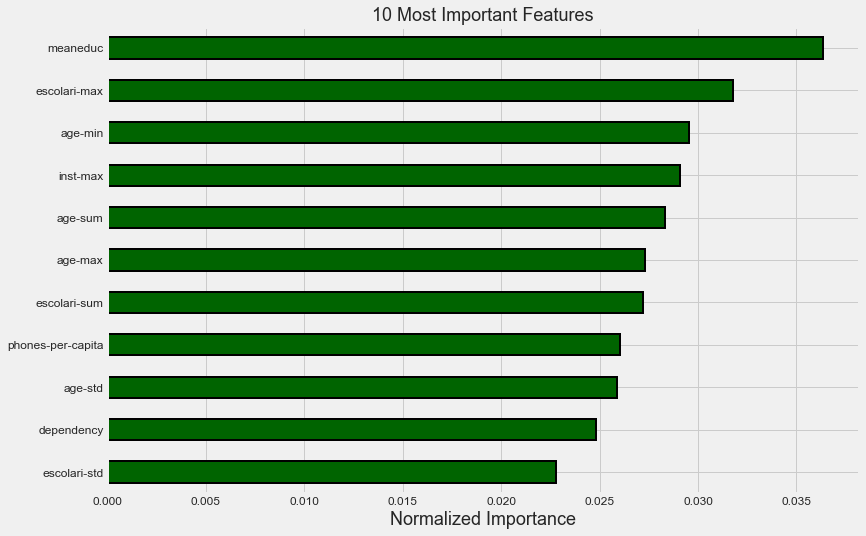

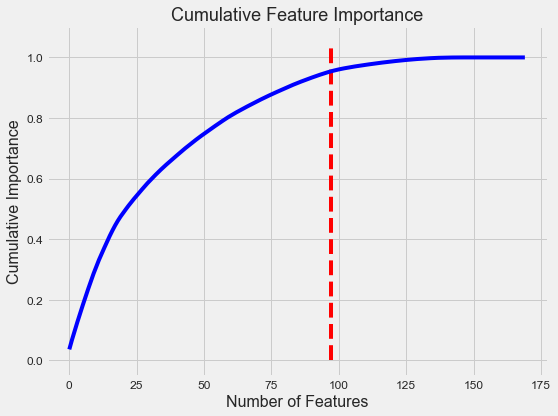

97 features required for 95% of cumulative importance.


In [261]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

### model selection (roughly)
we have to try out a number of different models to see which is optimal.  
we will try 8 Scikit-Learn models.

In [373]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [263]:
import warnings

In [264]:
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [265]:
model_results = cv_model(train_set, train_labels, LinearSVC(), 
                         'LSVC', model_results)

10 Fold CV Score: 0.27565 with std: 0.04449


In [266]:
model_results = cv_model(train_set, train_labels, 
                         GaussianNB(), 'GNB', model_results)

10 Fold CV Score: 0.17415 with std: 0.03664


In [267]:
model_results = cv_model(train_set, train_labels, 
                         MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32)),
                         'MLP', model_results)

10 Fold CV Score: 0.28508 with std: 0.06136


In [268]:
model_results = cv_model(train_set, train_labels, 
                          LinearDiscriminantAnalysis(), 
                          'LDA', model_results)

10 Fold CV Score: 0.31335 with std: 0.06361


In [269]:
model_results = cv_model(train_set, train_labels, 
                         RidgeClassifierCV(), 'RIDGE', model_results)

10 Fold CV Score: 0.27648 with std: 0.03181


In [270]:
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(train_set, train_labels, 
                             KNeighborsClassifier(n_neighbors = n),
                             f'knn-{n}', model_results)


KNN with 5 neighbors

10 Fold CV Score: 0.32761 with std: 0.03661

KNN with 10 neighbors

10 Fold CV Score: 0.29576 with std: 0.02384

KNN with 20 neighbors

10 Fold CV Score: 0.27221 with std: 0.0203


In [271]:
from sklearn.ensemble import ExtraTreesClassifier

model_results = cv_model(train_set, train_labels, 
                         ExtraTreesClassifier(n_estimators = 100, random_state = 10),
                         'EXT', model_results)

10 Fold CV Score: 0.32738 with std: 0.0427


In [272]:
model_results = cv_model(train_set, train_labels,
                          RandomForestClassifier(100, random_state=10),
                              'RF', model_results)

10 Fold CV Score: 0.34102 with std: 0.04428


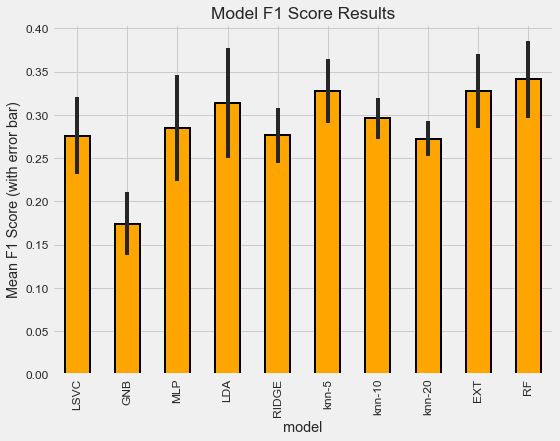

In [273]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

### Model Selection (다중공선성 제거)
one method for improving model performance is **feature selection**.
1. remove any columns with greater than 0.95 correlation
2. apply recursive feature elimination(RFECV) with the Scikit-learn library - 이게막 stepwise랑비슷한듯?

In [274]:
#1. correlation
train_set = pd.DataFrame(train_set, columns = features)
corr_matrix = train_set.corr()
#select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column])>0.95)]
to_drop

['v18q-count', 'female-sum']

In [277]:
corr_matrix.loc[corr_matrix['v18q-count'].abs()>0.9,corr_matrix['v18q-count'].abs()>0.9]

tamviv    hhsize  v18q-count
tamviv      1.000000  0.926667    0.925438
hhsize      0.926667  1.000000    0.998473
v18q-count  0.925438  0.998473    1.000000

In [278]:
train_set=train_set.drop(['v18q-count'],axis=1)

In [279]:
corr_matrix.loc[corr_matrix['female-sum'].abs()>0.9,corr_matrix['female-sum'].abs()>0.9]

r4m3  female-sum
r4m3        1.000000    0.994762
female-sum  0.994762    1.000000

In [280]:
train_set=train_set.drop(['female-sum'],axis=1)

In [286]:
test_set = pd.DataFrame(test_set,columns=features)
test_set=test_set.drop(to_drop,axis=1)
print(train_set.shape)
print(test_set.shape)
features = list(train_set.columns)

(2973, 168)
(7334, 168)


In [287]:
#2. Recursive feature elimination with random forest
# RFECV=Recursive Feature Elimination with Cross Validation
# At each iteration, it removes either a fraction of features or a set number of features. 
# The iterations continue until the cross validation score no longer improves.

from sklearn.feature_selection import RFECV

# Any model for feature selection
estimator = RandomForestClassifier(random_state = 10, n_estimators = 100,  n_jobs = -1) #n_jobs =사용할코어갯수

# Create the object
selector = RFECV(estimator, step = 1, cv = 3, scoring= scorer, n_jobs = -1)

In [288]:
selector.fit(train_set, train_labels)

RFECV(cv=3,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=-1,
   scoring=make_scorer(f1_score, average=macro), step=1, verbose=0)

57

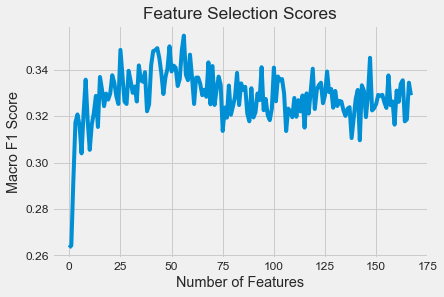

In [289]:
plt.plot(selector.grid_scores_);
plt.xlabel('Number of Features'); 
plt.ylabel('Macro F1 Score'); 
plt.title('Feature Selection Scores');
selector.n_features_

In [290]:
rankings = pd.DataFrame({'feature': list(train_set.columns), 'rank': list(selector.ranking_)}).sort_values('rank')
rankings.head(10)

feature  rank
83  phones-per-capita     1
70             hhsize     1
69             tamviv     1
68               r4t2     1
67               r4t1     1
66               r4m3     1
65               r4m2     1
71          hogar_nin     1
63               r4h3     1
60              rooms     1

In [291]:
train_selected = selector.transform(train_set)
test_selected = selector.transform(test_set)

In [292]:
# Convert back to dataframe
selected_features = train_set.columns[np.where(selector.ranking_==1)]
train_selected = pd.DataFrame(train_selected, columns = selected_features)
test_selected = pd.DataFrame(test_selected, columns = selected_features)

In [293]:
model_results = cv_model(train_selected, train_labels, model, 'RF-SEL', model_results)

10 Fold CV Score: 0.35945 with std: 0.05199


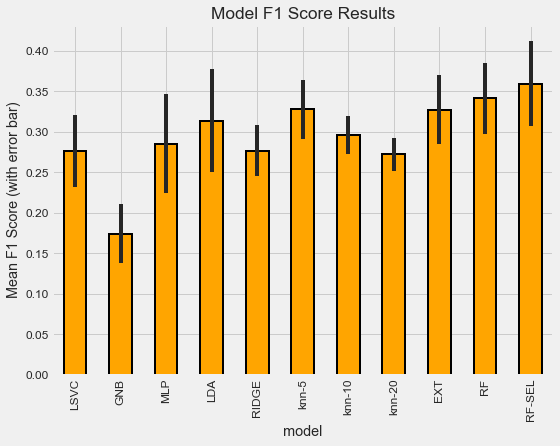

In [295]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

### Gradient Boosting Machine
what everyone uses at the end

In [299]:
test_ids = list(final.loc[final['Target'].isnull(), 'idhogar'])

In [300]:
def macro_f1_score(labels, predictions):
    # Reshape the predictions as needed
    predictions = predictions.reshape(len(np.unique(labels)), -1 ).argmax(axis = 0)
    
    metric_value = f1_score(labels, predictions, average = 'macro')
    
    # Return is name, value, is_higher_better
    return 'macro_f1', metric_value, True

In [301]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from IPython.display import display

def model_gbm(features, labels, test_features, test_ids, 
              nfolds = 5, return_preds = False, hyp = None):
    """Model using the GBM and cross validation.
       Trains with early stopping on each fold.
       Hyperparameters probably need to be tuned."""
    
    feature_names = list(features.columns)

    # Option for user specified hyperparameters
    if hyp is not None:
        # Using early stopping so do not need number of esimators
        if 'n_estimators' in hyp:
            del hyp['n_estimators']
        params = hyp
    
    else:
        # Model hyperparameters
        params = {'boosting_type': 'dart', 
                  'colsample_bytree': 0.88, 
                  'learning_rate': 0.028, 
                   'min_child_samples': 10, 
                   'num_leaves': 36, 'reg_alpha': 0.76, 
                   'reg_lambda': 0.43, 
                   'subsample_for_bin': 40000, 
                   'subsample': 0.54, 
                   'class_weight': 'balanced'}
    
    # Build the model
    model = lgb.LGBMClassifier(**params, objective = 'multiclass', 
                               n_jobs = -1, n_estimators = 10000,
                               random_state = 10)
    
    # Using stratified kfold cross validation
    strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)
    
    # Hold all the predictions from each fold
    predictions = pd.DataFrame()
    importances = np.zeros(len(feature_names))
    
    # Convert to arrays for indexing
    features = np.array(features)
    test_features = np.array(test_features)
    labels = np.array(labels).reshape((-1 ))
    
    valid_scores = []
    
    # Iterate through the folds
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):
        
        # Dataframe for fold predictions
        fold_predictions = pd.DataFrame()
        
        # Training and validation data
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]
        
        # Train with early stopping
        model.fit(X_train, y_train, early_stopping_rounds = 100, 
                  eval_metric = macro_f1_score,
                  eval_set = [(X_train, y_train), (X_valid, y_valid)],
                  eval_names = ['train', 'valid'],
                  verbose = 200)
        
        # Record the validation fold score
        valid_scores.append(model.best_score_['valid']['macro_f1'])
        
        # Make predictions from the fold as probabilities
        fold_probabilitites = model.predict_proba(test_features)
        
        # Record each prediction for each class as a separate column
        for j in range(4):
            fold_predictions[(j + 1)] = fold_probabilitites[:, j]
            
        # Add needed information for predictions 
        fold_predictions['idhogar'] = test_ids
        fold_predictions['fold'] = (i+1)
        
        # Add the predictions as new rows to the existing predictions
        predictions = predictions.append(fold_predictions)
        
        # Feature importances
        importances += model.feature_importances_ / nfolds   
        
        # Display fold information
        display(f'Fold {i + 1}, Validation Score: {round(valid_scores[i], 5)}, Estimators Trained: {model.best_iteration_}')

    # Feature importances dataframe
    feature_importances = pd.DataFrame({'feature': feature_names,
                                        'importance': importances})
    
    valid_scores = np.array(valid_scores)
    display(f'{nfolds} cross validation score: {round(valid_scores.mean(), 5)} with std: {round(valid_scores.std(), 5)}.')
    
    # If we want to examine predictions don't average over folds
    if return_preds:
        predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
        predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
        return predictions, feature_importances
    
    # Average the predictions over folds
    predictions = predictions.groupby('idhogar', as_index = False).mean()
    
    # Find the class and associated probability
    predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
    predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
    predictions = predictions.drop(columns = ['fold'])
    
    # Merge with the base to have one prediction for each individual
    submission = submission_base.merge(predictions[['idhogar', 'Target']], on = 'idhogar', how = 'left').drop(columns = ['idhogar'])
        
    # Fill in the individuals that do not have a head of household with 4 since these will not be scored
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)
    
    # return the submission and feature importances along with validation scores
    return submission, feature_importances, valid_scores

In [302]:
%%capture --no-display
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, test_set, test_ids, return_preds=True)

'Fold 1, Validation Score: 0.43745, Estimators Trained: 0'

'Fold 2, Validation Score: 0.40876, Estimators Trained: 0'

'Fold 3, Validation Score: 0.36107, Estimators Trained: 0'

'Fold 4, Validation Score: 0.4354, Estimators Trained: 0'

'Fold 5, Validation Score: 0.43765, Estimators Trained: 0'

'5 cross validation score: 0.41607 with std: 0.02958.'

try selected features

In [303]:
%%capture --no-display
submission, gbm_fi_selected, valid_scores_selected = model_gbm(train_selected, 
                                                               train_labels, test_selected, test_ids)

'Fold 1, Validation Score: 0.3993, Estimators Trained: 0'

'Fold 2, Validation Score: 0.3755, Estimators Trained: 0'

'Fold 3, Validation Score: 0.42798, Estimators Trained: 0'

'Fold 4, Validation Score: 0.36538, Estimators Trained: 0'

'Fold 5, Validation Score: 0.40027, Estimators Trained: 0'

'5 cross validation score: 0.39369 with std: 0.02183.'

## 4. Tuning hyperparameters
methods  
    1.manual   
    2.Grid search  
    3.random search  
    4.automated optimization(esp. Hyperopt, which uses a modified version of Bayesian Optimization w/ Tree Parzen Estimator

### Hyperopt
Bayesian optimization requires 4 parts:  
    1. Objective function : what we want to maximize (or minimize)  
    2. Domain space : region over which to search  
    3. Algorithm for choosing next hyperparameters: uses past results to suggest next values(bayesian특징)  
    4. Results history : saves the past results

In [305]:
!pip install hyperopt
from hyperopt import hp, tpe, Trials, fmin, STATUS_OK
from hyperopt.pyll.stochastic import sample

In [306]:
import csv
import ast
from timeit import default_timer as timer

In [307]:
#hyperopt needs a score to minimize, so return 1-MacroF1score
def objective(hyperparameters, nfolds=5):
    """Return validation score from hyperparameters for LightGBM"""
    
    # Keep track of evals
    global ITERATION
    ITERATION += 1
    
    # Retrieve the subsample
    subsample = hyperparameters['boosting_type'].get('subsample', 1.0)
    subsample_freq = hyperparameters['boosting_type'].get('subsample_freq', 0)
    
    boosting_type = hyperparameters['boosting_type']['boosting_type']
    
    if boosting_type == 'dart':
        hyperparameters['drop_rate'] = hyperparameters['boosting_type']['drop_rate']
    
    # Subsample and subsample frequency to top level keys
    hyperparameters['subsample'] = subsample
    hyperparameters['subsample_freq'] = subsample_freq
    hyperparameters['boosting_type'] = boosting_type
    
    # Whether or not to use limit maximum depth
    if not hyperparameters['limit_max_depth']:
        hyperparameters['max_depth'] = -1
    
    # Make sure parameters that need to be integers are integers
    for parameter_name in ['max_depth', 'num_leaves', 'subsample_for_bin', 
                           'min_child_samples', 'subsample_freq']:
        hyperparameters[parameter_name] = int(hyperparameters[parameter_name])

    if 'n_estimators' in hyperparameters:
        del hyperparameters['n_estimators']
    
    # Using stratified kfold cross validation
    strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)
    
    # Convert to arrays for indexing
    features = np.array(train_selected)
    labels = np.array(train_labels).reshape((-1 ))
    
    valid_scores = []
    best_estimators = []
    run_times = []
    
    model = lgb.LGBMClassifier(**hyperparameters, class_weight = 'balanced',
                               n_jobs=-1, metric = 'None',
                               n_estimators=10000)
    
    # Iterate through the folds
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):
        
        # Training and validation data
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]
        
        start = timer()
        # Train with early stopping
        model.fit(X_train, y_train, early_stopping_rounds = 100, 
                  eval_metric = macro_f1_score, 
                  eval_set = [(X_train, y_train), (X_valid, y_valid)],
                  eval_names = ['train', 'valid'],
                  verbose = 400)
        end = timer()
        # Record the validation fold score
        valid_scores.append(model.best_score_['valid']['macro_f1'])
        best_estimators.append(model.best_iteration_)
        
        run_times.append(end - start)
    
    score = np.mean(valid_scores)
    score_std = np.std(valid_scores)
    loss = 1 - score
    
    run_time = np.mean(run_times)
    run_time_std = np.std(run_times)
    
    estimators = int(np.mean(best_estimators))
    hyperparameters['n_estimators'] = estimators
    
    # Write to the csv file ('a' means append)
    of_connection = open(OUT_FILE, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, hyperparameters, ITERATION, run_time, score, score_std])
    of_connection.close()
    
    # Display progress
    if ITERATION % PROGRESS == 0:
        display(f'Iteration: {ITERATION}, Current Score: {round(score, 4)}.')
    
    return {'loss': loss, 'hyperparameters': hyperparameters, 'iteration': ITERATION,
            'time': run_time, 'time_std': run_time_std, 'status': STATUS_OK, 
            'score': score, 'score_std': score_std}

In [308]:
space = {
    'boosting_type': hp.choice('boosting_type', 
                              [{'boosting_type': 'gbdt', 
                                'subsample': hp.uniform('gdbt_subsample', 0.5, 1),
                                'subsample_freq': hp.quniform('gbdt_subsample_freq', 1, 10, 1)}, 
                               {'boosting_type': 'dart', 
                                 'subsample': hp.uniform('dart_subsample', 0.5, 1),
                                 'subsample_freq': hp.quniform('dart_subsample_freq', 1, 10, 1),
                                 'drop_rate': hp.uniform('dart_drop_rate', 0.1, 0.5)},
                                {'boosting_type': 'goss',
                                 'subsample': 1.0,
                                 'subsample_freq': 0}]),
    'limit_max_depth': hp.choice('limit_max_depth', [True, False]),
    'max_depth': hp.quniform('max_depth', 1, 40, 1),
    'num_leaves': hp.quniform('num_leaves', 3, 50, 1),
    'learning_rate': hp.loguniform('learning_rate', 
                                   np.log(0.025), 
                                   np.log(0.25)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 2000, 100000, 2000),
    'min_child_samples': hp.quniform('min_child_samples', 5, 80, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.5, 1.0)
}

In [310]:
sample(space) #매번달라짐

{'boosting_type': {'boosting_type': 'goss',
  'subsample': 1.0,
  'subsample_freq': 0},
 'colsample_bytree': 0.8682151059129024,
 'learning_rate': 0.19172297834954974,
 'limit_max_depth': True,
 'max_depth': 37.0,
 'min_child_samples': 55.0,
 'num_leaves': 19.0,
 'reg_alpha': 0.14705717089330617,
 'reg_lambda': 0.6347215921015733,
 'subsample_for_bin': 34000.0}

In [311]:
# Record results
trials = Trials()

# Create a file and open a connection
OUT_FILE = 'optimization.csv'
of_connection = open(OUT_FILE, 'w')
writer = csv.writer(of_connection)

MAX_EVALS = 100
PROGRESS = 10
N_FOLDS = 5
ITERATION = 0

# Write column names
headers = ['loss', 'hyperparameters', 'iteration', 'runtime', 'score', 'std']
writer.writerow(headers)
of_connection.close()

In [312]:
%%capture --no-display
display("Running Optimization for {} Trials.".format(MAX_EVALS))

# Run optimization
best = fmin(fn = objective, space = space, algo = tpe.suggest, trials = trials,
            max_evals = MAX_EVALS)

'Running Optimization for 100 Trials.'

'Iteration: 10, Current Score: 0.4171.'

'Iteration: 20, Current Score: 0.4248.'

'Iteration: 30, Current Score: 0.4235.'

'Iteration: 40, Current Score: 0.4362.'

'Iteration: 50, Current Score: 0.4231.'

'Iteration: 60, Current Score: 0.4254.'

'Iteration: 70, Current Score: 0.4334.'

'Iteration: 80, Current Score: 0.3886.'

'Iteration: 90, Current Score: 0.4343.'

'Iteration: 100, Current Score: 0.4179.'

In [313]:
import json

# Save the trial results
with open('trials.json', 'w') as f:
    f.write(json.dumps(str(trials)))

In [316]:
results = pd.read_csv(OUT_FILE).sort_values('loss', ascending = True).reset_index()
results.head()

index      loss                                    hyperparameters  \
0     36  0.551392  {'boosting_type': 'gbdt', 'colsample_bytree': ...   
1     70  0.553226  {'boosting_type': 'gbdt', 'colsample_bytree': ...   
2     91  0.553741  {'boosting_type': 'gbdt', 'colsample_bytree': ...   
3     35  0.554441  {'boosting_type': 'gbdt', 'colsample_bytree': ...   
4     11  0.556611  {'boosting_type': 'gbdt', 'colsample_bytree': ...   

   iteration   runtime     score       std  
0         37  3.387846  0.448608  0.016090  
1         71  2.669119  0.446774  0.017863  
2         92  2.872728  0.446259  0.011162  
3         36  3.158659  0.445559  0.015311  
4         12  1.322941  0.443389  0.018415

In [319]:
results.iloc[0,2]

"{'boosting_type': 'gbdt', 'colsample_bytree': 0.8100895526161423, 'learning_rate': 0.06488139969615211, 'limit_max_depth': False, 'max_depth': -1, 'min_child_samples': 25, 'num_leaves': 22, 'reg_alpha': 0.6491713564354156, 'reg_lambda': 0.058086935671797624, 'subsample_for_bin': 78000, 'subsample': 0.6943093401731498, 'subsample_freq': 6, 'n_estimators': 144}"

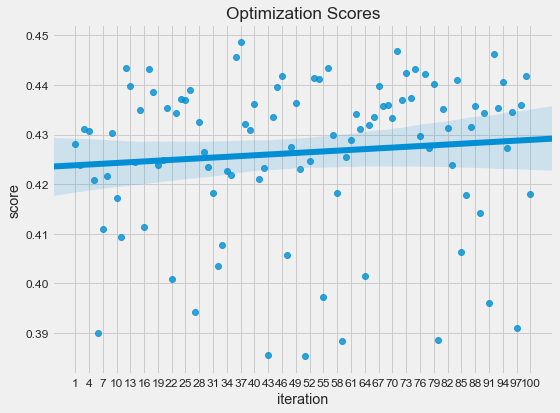

In [317]:
plt.figure(figsize = (8, 6))
sns.regplot('iteration', 'score', data = results);
plt.title("Optimization Scores");
plt.xticks(list(range(1, results['iteration'].max() + 1, 3)));

In [320]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from IPython.display import display

def model_gbm(features, labels, test_features, test_ids, 
              nfolds = 5, return_preds = False, hyp = None):
   
    feature_names = list(features.columns)

    if hyp is not None:
        if 'n_estimators' in hyp:
            del hyp['n_estimators']
        params = hyp
    
    else:
        params = {'boosting_type': 'dart', 
                  'colsample_bytree': 0.88, 
                  'learning_rate': 0.028, 
                   'min_child_samples': 10, 
                   'num_leaves': 36, 'reg_alpha': 0.76, 
                   'reg_lambda': 0.43, 
                   'subsample_for_bin': 40000, 
                   'subsample': 0.54, 
                   'class_weight': 'balanced', 'n_estimators':150}

    model = lgb.LGBMClassifier(**params, class_weight = 'balanced',
                               objective = 'multiclass', 
                               n_jobs = -1,
                               random_state = 10)
    
    strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)
    
    predictions = pd.DataFrame()
    importances = np.zeros(len(feature_names))
    
    # Convert to arrays for indexing
    features = np.array(features)
    test_features = np.array(test_features)
    labels = np.array(labels).reshape((-1 ))
    
    valid_scores = []
    
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):
        
        fold_predictions = pd.DataFrame()
        
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]
        
        model.fit(X_train, y_train, early_stopping_rounds = 100, 
                  eval_metric = macro_f1_score,
                  eval_set = [(X_train, y_train), (X_valid, y_valid)],
                  eval_names = ['train', 'valid'],
                  verbose = 200)
        
        valid_scores.append(model.best_score_['valid']['macro_f1'])
        
        fold_probabilitites = model.predict_proba(test_features)
        
        for j in range(4):
            fold_predictions[(j + 1)] = fold_probabilitites[:, j]
            
        fold_predictions['idhogar'] = test_ids
        fold_predictions['fold'] = (i+1)
        
        predictions = predictions.append(fold_predictions)
        
        # Feature importances
        importances += model.feature_importances_ / nfolds   
        
        display(f'Fold {i + 1}, Validation Score: {round(valid_scores[i], 5)}, Estimators Trained: {model.best_iteration_}')

    # Feature importances dataframe
    feature_importances = pd.DataFrame({'feature': feature_names,
                                        'importance': importances})
    
    valid_scores = np.array(valid_scores)
    display(f'{nfolds} cross validation score: {round(valid_scores.mean(), 5)} with std: {round(valid_scores.std(), 5)}.')
    
    # If we want to examine predictions don't average over folds
    if return_preds:
        predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
        predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
        return predictions, feature_importances
    
    # Average the predictions over folds
    predictions = predictions.groupby('idhogar', as_index = False).mean()
    
    # Find the class and associated probability
    predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
    predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
    predictions = predictions.drop(columns = ['fold'])
    
    # Merge with the base to have one prediction for each individual
    submission = submission_base.merge(predictions[['idhogar', 'Target']], on = 'idhogar', how = 'left').drop(columns = ['idhogar'])
        
    # Fill in the individuals that do not have a head of household with 4 since these will not be scored
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)
    
    # return the submission and feature importances along with validation scores
    return submission, feature_importances, valid_scores

In [321]:
hyp = {'boosting_type': 'gbdt', 
       'colsample_bytree': 0.8100895526161423, 
       'learning_rate': 0.06488139969615211, 
       'limit_max_depth': False, 
       'max_depth': -1, 
       'min_child_samples': 25, 
       'num_leaves': 22, 
       'reg_alpha': 0.6491713564354156, 
       'reg_lambda': 0.058086935671797624, 
       'subsample_for_bin': 78000, 
       'subsample': 0.6943093401731498, 
       'subsample_freq': 6, 
       'n_estimators': 144}

In [323]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, 
                                             test_set, test_ids, 
                                             nfolds = 10, return_preds=False, hyp=hyp)

In [325]:
valid_scores

array([0.37641022, 0.36668887, 0.43262104, 0.43387683, 0.40995917,
       0.39471029, 0.38500051, 0.45011348, 0.41909467, 0.34934212])

In [326]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_selected, train_labels, 
                                             test_selected, test_ids, 
                                             nfolds = 10, return_preds=False, hyp=hyp)

In [327]:
valid_scores

array([0.39347763, 0.44635351, 0.46335318, 0.4128365 , 0.41073372,
       0.4054141 , 0.45004319, 0.40754043, 0.43344583, 0.45569031])

In [328]:
submission.to_csv('submission.csv', index = False)

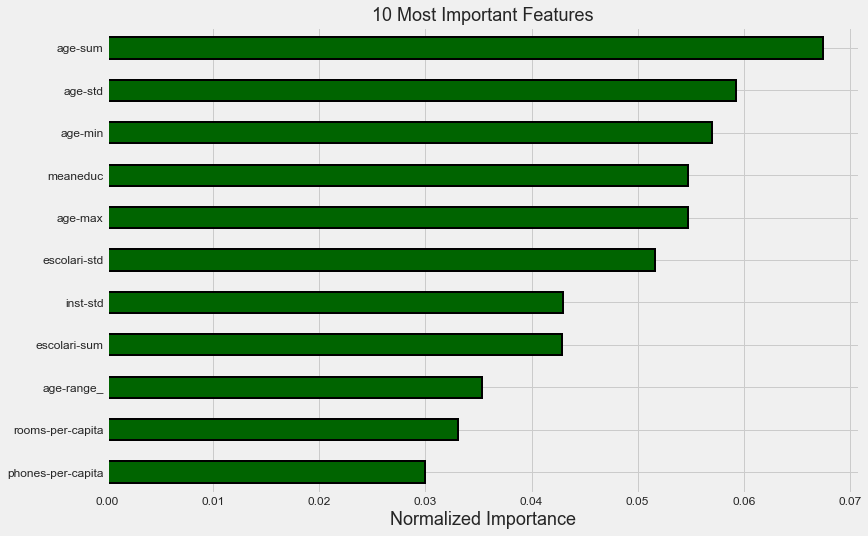

In [329]:
_ = plot_feature_importances(gbm_fi)

## 5. Dimension Reduction (PCA)

In [374]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE #isometric feature mapping

#주의: TSNE는 transform method가 없으며 preprocessing tool로 쓸수 X.(only visualizing용)

In [375]:
n_components = 3 #주성분 3개. (map down to 3 dimensions)

pca = PCA(n_components=n_components)
tsne = TSNE(n_components=n_components)

In [378]:
train_df = train_selected.copy()
test_df = test_selected.copy()

for method,name in zip([pca,tsne],['pca','tsne']):
    # TSNE has no transform method
    if name == 'tsne':
        reduction = method.fit_transform(train_selected)
        
    else:
        reduction = method.fit_transform(train_selected) # reduction하는 method를 fit 시키고
        test_reduction = method.transform(test_selected) # fit시킨 method를 test에 apply
    
        test_df['%s_c1' % name] = test_reduction[:, 0]
        test_df['%s_c2' % name] = test_reduction[:, 1]
        test_df['%s_c3' % name] = test_reduction[:, 2]

    train_df['%s_c1' % name] = reduction[:, 0]
    train_df['%s_c2' % name] = reduction[:, 1]
    train_df['%s_c3' % name] = reduction[:, 2]
        

In [381]:
train_df.columns

Index(['paredblolad', 'paredpreb', 'pisomoscer', 'cielorazo', 'energcocinar2',
       'energcocinar3', 'tipovivi1', 'lugar1', 'area1', 'dependency', 'edjefe',
       'edjefa', 'meaneduc', 'overcrowding', 'rooms', 'r4h2', 'r4h3', 'r4m2',
       'r4m3', 'r4t1', 'r4t2', 'tamviv', 'hhsize', 'hogar_nin', 'hogar_adul',
       'bedrooms', 'qmobilephone', 'walls', 'roof', 'floor',
       'walls+roof+floor', 'warning', 'bonus', 'phones-per-capita',
       'rooms-per-capita', 'dis-sum', 'female-std', 'estadocivil5-sum',
       'estadocivil7-sum', 'estadocivil7-std', 'parentesco2-std',
       'parentesco3-sum', 'escolari-min', 'escolari-max', 'escolari-sum',
       'escolari-std', 'escolari-range_', 'age-min', 'age-max', 'age-sum',
       'age-std', 'age-range_', 'inst-max', 'inst-std', 'inst-range_',
       'tech-min', 'tech-sum', 'pca_c1', 'pca_c2', 'pca_c3', 'tsne_c1',
       'tsne_c2', 'tsne_c3'],
      dtype='object')

In [383]:
train_labels

array([4, 4, 4, ..., 4, 2, 2])

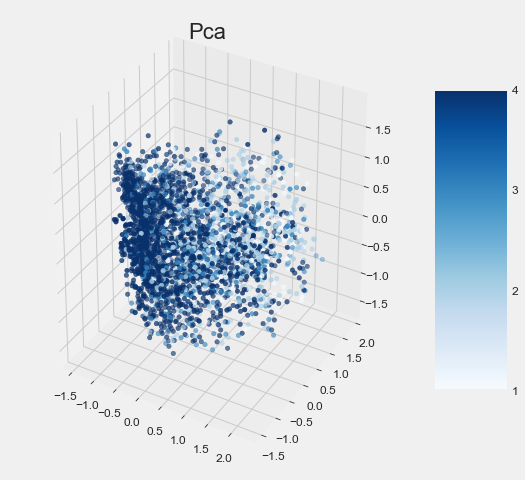

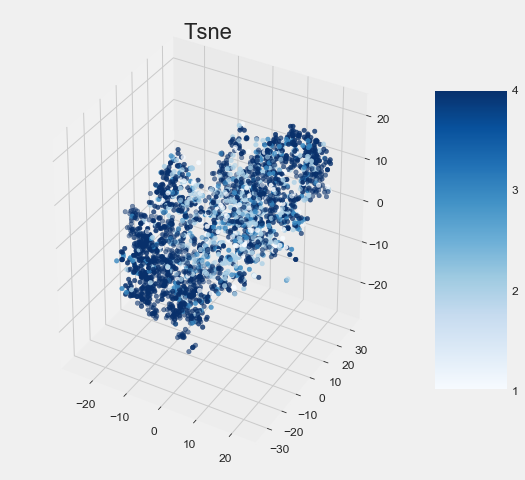

In [386]:
#visualize
from mpl_toolkits.mplot3d import Axes3D
# Plot each method
for method,name in zip([pca,tsne],['pca','tsne']):
    
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    p = ax.scatter(train_df['%s_c1' % name], train_df['%s_c2'  % name], train_df['%s_c3'  % name], 
                   c = train_labels, cmap=plt.cm.Blues)
    
    plt.title(f'{name.capitalize()}', size = 22)
    fig.colorbar(p, aspect = 4, ticks = [1, 2, 3, 4])